In [24]:
import os
import json

def get_category_files(base_path, target_styles, data_type='image', max_files=None):
    """
    특정 카테고리의 파일들을 수집하고 정렬하는 함수
    
    Args:
        base_path (str): 기본 경로
        target_styles (list): 처리할 카테고리 리스트
        data_type (str): 'image' 또는 'label' (기본값: 'image')
        max_files (dict): 각 카테고리별 최대 파일 수 (기본값: None)
    
    Returns:
        dict: 카테고리별 정렬된 파일 경로 딕셔너리
    """
    category_files = {}
    
    for style in target_styles:
        style_path = os.path.join(base_path, style)
        if not os.path.isdir(style_path):
            print(f"경고: {style} 카테고리 폴더가 존재하지 않습니다.")
            continue
            
        if data_type == 'image':
            # 이미지 파일 수집 및 정렬
            files = [os.path.join(style_path, f) for f in os.listdir(style_path) 
                    if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            files.sort()  # 파일 경로 기준 정렬
        elif data_type == 'label':
            # JSON 파일 수집 및 정렬
            files = [os.path.join(style_path, f) for f in os.listdir(style_path) 
                    if f.lower().endswith('.json')]
            files.sort()  # 파일 경로 기준 정렬
        else:
            raise ValueError("data_type은 'image' 또는 'label'이어야 합니다.")
        
        # 최대 파일 수 제한
        if max_files and style in max_files:
            files = files[:max_files[style]]
            
        category_files[style] = files
    
    # 결과 출력
    for style, files in category_files.items():
        print(f"\n{style} 스타일:")
        print(f"파일 개수: {len(files)}개")
        if files:
            if data_type == 'image':
                print("첫 번째 이미지:", os.path.basename(files[0]))
            else:
                try:
                    with open(files[0], 'r', encoding='utf-8') as f:
                        json_data = json.load(f)
                    print("첫 번째 JSON 파일:", os.path.basename(files[0]))
                    print("JSON 키:", list(json_data.keys()))
                except:
                    print("JSON 파일 읽기 실패:", os.path.basename(files[0]))
    
    return category_files

# 사용 예시
base_path = "E:/Workspace/K-fashion/image"
# base_path = "./k_fashsion/원천데이터/원천데이터_1"
target_styles = ['Street', 'Genderless']
max_files = {'Street': 6000, 'Genderless': 2000}

# 이미지 파일 수집
image_files = get_category_files(base_path, target_styles, data_type='image', max_files=max_files)

# 라벨 파일 수집
label_path = "E:/Workspace/K-fashion/label"
# label_path = "./k_fashsion/라벨링데이터"
label_files = get_category_files(label_path, target_styles, data_type='label',max_files=max_files)


Street 스타일:
파일 개수: 6000개
첫 번째 이미지: 1.jpg

Genderless 스타일:
파일 개수: 2000개
첫 번째 이미지: 1004302.jpg

Street 스타일:
파일 개수: 6000개
첫 번째 JSON 파일: 1.json
JSON 키: ['이미지 정보', '데이터셋 정보']

Genderless 스타일:
파일 개수: 2000개
첫 번째 JSON 파일: 1004302.json
JSON 키: ['이미지 정보', '데이터셋 정보']


In [25]:
# image_files 딕셔너리의 모든 경로를 수정
for style, paths in image_files.items():
    image_files[style] = [path.replace('\\', '/') for path in paths]

# 수정된 경로 출력 (확인용)
image_files

{'Street': ['E:/Workspace/K-fashion/image/Street/1.jpg',
  'E:/Workspace/K-fashion/image/Street/1000000.jpg',
  'E:/Workspace/K-fashion/image/Street/1000001.jpg',
  'E:/Workspace/K-fashion/image/Street/1000002.jpg',
  'E:/Workspace/K-fashion/image/Street/1000003.jpg',
  'E:/Workspace/K-fashion/image/Street/1000006.jpg',
  'E:/Workspace/K-fashion/image/Street/1000007.jpg',
  'E:/Workspace/K-fashion/image/Street/1000008.jpg',
  'E:/Workspace/K-fashion/image/Street/1000009.jpg',
  'E:/Workspace/K-fashion/image/Street/1000010.jpg',
  'E:/Workspace/K-fashion/image/Street/1000011.jpg',
  'E:/Workspace/K-fashion/image/Street/1000012.jpg',
  'E:/Workspace/K-fashion/image/Street/1000013.jpg',
  'E:/Workspace/K-fashion/image/Street/1000016.jpg',
  'E:/Workspace/K-fashion/image/Street/1000017.jpg',
  'E:/Workspace/K-fashion/image/Street/1000018.jpg',
  'E:/Workspace/K-fashion/image/Street/1000019.jpg',
  'E:/Workspace/K-fashion/image/Street/1000020.jpg',
  'E:/Workspace/K-fashion/image/Street/100

In [14]:
# label_files 딕셔너리의 모든 경로를 수정
for style, paths in label_files.items():
    label_files[style] = [path.replace('\\', '/') for path in paths]
    
# 수정된 경로 출력 (확인용)
label_files

{'스트리트': ['E:/Workspace/K-fashion/라벨링데이터/스트리트/1.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000000.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000001.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000002.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000003.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000006.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000007.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000008.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000009.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000010.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000011.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000012.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000013.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000016.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000017.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000018.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000019.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/1000020.json',
  'E:/Workspace/K-fashion/라벨링데이터/스트리트/100002

In [4]:
category_names = [
    "Top", "Blouse", "Casual Top", "Knitwear", "Shirt", "Vest",
    "Coat", "Jacket", "Jumper", "Padding",
    "Jeans", "Pants", "Skirt", "Leggings",
    "Dress", "Jumpsuit", "Swimsuit"
    ]

print(len(category_names))

17


  0%|          | 0/8000 [00:00<?, ?it/s]

  1%|          | 77/8000 [00:00<00:20, 389.10it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1004302.jpg -> e:\Workspace\AIService2\datasets\images\train\000001.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1004303.jpg -> e:\Workspace\AIService2\datasets\images\train\000002.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1004304.jpg -> e:\Workspace\AIService2\datasets\images\train\000003.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1004305.jpg -> e:\Workspace\AIService2\datasets\images\train\000004.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1004306.jpg -> e:\Workspace\AIService2\datasets\images\train\000005.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1004307.jpg -> e:\Workspace\AIService2\datasets\images\train\000006.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1004308.jpg -> e:\Workspace\AIService2\datasets\images\train\000007.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1004309.jpg -> e:\Workspace\AIService2\datasets\images\train\000008.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1004312.jpg -> e:\Workspace\

  2%|▏         | 163/8000 [00:00<00:18, 413.68it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1006644.jpg -> e:\Workspace\AIService2\datasets\images\train\000078.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1006645.jpg -> e:\Workspace\AIService2\datasets\images\train\000079.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1006646.jpg -> e:\Workspace\AIService2\datasets\images\train\000080.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1006647.jpg -> e:\Workspace\AIService2\datasets\images\train\000081.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1006648.jpg -> e:\Workspace\AIService2\datasets\images\train\000082.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1006649.jpg -> e:\Workspace\AIService2\datasets\images\train\000083.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1006879.jpg -> e:\Workspace\AIService2\datasets\images\train\000084.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1006880.jpg -> e:\Workspace\AIService2\datasets\images\train\000085.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1006881.jpg -> e:\Workspace\

  3%|▎         | 250/8000 [00:00<00:18, 411.35it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1011756.jpg -> e:\Workspace\AIService2\datasets\images\train\000164.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1011759.jpg -> e:\Workspace\AIService2\datasets\images\train\000165.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1011760.jpg -> e:\Workspace\AIService2\datasets\images\train\000166.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1011761.jpg -> e:\Workspace\AIService2\datasets\images\train\000167.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1011782.jpg -> e:\Workspace\AIService2\datasets\images\train\000168.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1011783.jpg -> e:\Workspace\AIService2\datasets\images\train\000169.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1011784.jpg -> e:\Workspace\AIService2\datasets\images\train\000170.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1011785.jpg -> e:\Workspace\AIService2\datasets\images\train\000171.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1011786.jpg -> e:\Workspace\

  4%|▎         | 292/8000 [00:00<00:19, 404.42it/s]

파일: E:/Workspace/K-fashion/image/Genderless/101378.jpg -> e:\Workspace\AIService2\datasets\images\train\000251.jpg
파일: E:/Workspace/K-fashion/image/Genderless/101498.jpg -> e:\Workspace\AIService2\datasets\images\train\000252.jpg
파일: E:/Workspace/K-fashion/image/Genderless/101500.jpg -> e:\Workspace\AIService2\datasets\images\train\000253.jpg
파일: E:/Workspace/K-fashion/image/Genderless/101501.jpg -> e:\Workspace\AIService2\datasets\images\train\000254.jpg
파일: E:/Workspace/K-fashion/image/Genderless/101502.jpg -> e:\Workspace\AIService2\datasets\images\train\000255.jpg
파일: E:/Workspace/K-fashion/image/Genderless/101503.jpg -> e:\Workspace\AIService2\datasets\images\train\000256.jpg
파일: E:/Workspace/K-fashion/image/Genderless/101505.jpg -> e:\Workspace\AIService2\datasets\images\train\000257.jpg
파일: E:/Workspace/K-fashion/image/Genderless/101508.jpg -> e:\Workspace\AIService2\datasets\images\train\000258.jpg
파일: E:/Workspace/K-fashion/image/Genderless/101509.jpg -> e:\Workspace\AIService

  5%|▍         | 375/8000 [00:00<00:18, 407.75it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1017049.jpg -> e:\Workspace\AIService2\datasets\images\train\000334.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017050.jpg -> e:\Workspace\AIService2\datasets\images\train\000335.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017051.jpg -> e:\Workspace\AIService2\datasets\images\train\000336.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017053.jpg -> e:\Workspace\AIService2\datasets\images\train\000337.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017054.jpg -> e:\Workspace\AIService2\datasets\images\train\000338.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017055.jpg -> e:\Workspace\AIService2\datasets\images\train\000339.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017056.jpg -> e:\Workspace\AIService2\datasets\images\train\000340.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017057.jpg -> e:\Workspace\AIService2\datasets\images\train\000341.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017060.jpg -> e:\Workspace\

  6%|▌         | 464/8000 [00:01<00:19, 390.11it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1017182.jpg -> e:\Workspace\AIService2\datasets\images\train\000419.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017183.jpg -> e:\Workspace\AIService2\datasets\images\train\000420.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017184.jpg -> e:\Workspace\AIService2\datasets\images\train\000421.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017185.jpg -> e:\Workspace\AIService2\datasets\images\train\000422.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017186.jpg -> e:\Workspace\AIService2\datasets\images\train\000423.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017187.jpg -> e:\Workspace\AIService2\datasets\images\train\000424.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017190.jpg -> e:\Workspace\AIService2\datasets\images\train\000425.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017191.jpg -> e:\Workspace\AIService2\datasets\images\train\000426.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1017192.jpg -> e:\Workspace\

  7%|▋         | 547/8000 [00:01<00:18, 397.84it/s]

파일: E:/Workspace/K-fashion/image/Genderless/102372.jpg -> e:\Workspace\AIService2\datasets\images\train\000491.jpg
파일: E:/Workspace/K-fashion/image/Genderless/102373.jpg -> e:\Workspace\AIService2\datasets\images\train\000492.jpg
파일: E:/Workspace/K-fashion/image/Genderless/102374.jpg -> e:\Workspace\AIService2\datasets\images\train\000493.jpg
파일: E:/Workspace/K-fashion/image/Genderless/102375.jpg -> e:\Workspace\AIService2\datasets\images\train\000494.jpg
파일: E:/Workspace/K-fashion/image/Genderless/102378.jpg -> e:\Workspace\AIService2\datasets\images\train\000495.jpg
파일: E:/Workspace/K-fashion/image/Genderless/102380.jpg -> e:\Workspace\AIService2\datasets\images\train\000496.jpg
파일: E:/Workspace/K-fashion/image/Genderless/102381.jpg -> e:\Workspace\AIService2\datasets\images\train\000497.jpg
파일: E:/Workspace/K-fashion/image/Genderless/102442.jpg -> e:\Workspace\AIService2\datasets\images\train\000498.jpg
파일: E:/Workspace/K-fashion/image/Genderless/102443.jpg -> e:\Workspace\AIService

  8%|▊         | 636/8000 [00:01<00:17, 419.42it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1028620.jpg -> e:\Workspace\AIService2\datasets\images\train\000578.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1028621.jpg -> e:\Workspace\AIService2\datasets\images\train\000579.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1028622.jpg -> e:\Workspace\AIService2\datasets\images\train\000580.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1028623.jpg -> e:\Workspace\AIService2\datasets\images\train\000581.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1028624.jpg -> e:\Workspace\AIService2\datasets\images\train\000582.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1028625.jpg -> e:\Workspace\AIService2\datasets\images\train\000583.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1028655.jpg -> e:\Workspace\AIService2\datasets\images\train\000584.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1028656.jpg -> e:\Workspace\AIService2\datasets\images\train\000585.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1028659.jpg -> e:\Workspace\

  9%|▉         | 722/8000 [00:01<00:18, 390.42it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1030693.jpg -> e:\Workspace\AIService2\datasets\images\train\000672.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1030694.jpg -> e:\Workspace\AIService2\datasets\images\train\000673.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1030695.jpg -> e:\Workspace\AIService2\datasets\images\train\000674.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1030696.jpg -> e:\Workspace\AIService2\datasets\images\train\000675.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1030697.jpg -> e:\Workspace\AIService2\datasets\images\train\000676.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1030698.jpg -> e:\Workspace\AIService2\datasets\images\train\000677.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1030699.jpg -> e:\Workspace\AIService2\datasets\images\train\000678.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1030700.jpg -> e:\Workspace\AIService2\datasets\images\train\000679.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1030723.jpg -> e:\Workspace\

 10%|█         | 804/8000 [00:01<00:18, 395.86it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1031118.jpg -> e:\Workspace\AIService2\datasets\images\train\000743.jpg
파일: E:/Workspace/K-fashion/image/Genderless/103138.jpg -> e:\Workspace\AIService2\datasets\images\train\000744.jpg
파일: E:/Workspace/K-fashion/image/Genderless/103139.jpg -> e:\Workspace\AIService2\datasets\images\train\000745.jpg
파일: E:/Workspace/K-fashion/image/Genderless/103140.jpg -> e:\Workspace\AIService2\datasets\images\train\000746.jpg
파일: E:/Workspace/K-fashion/image/Genderless/103143.jpg -> e:\Workspace\AIService2\datasets\images\train\000747.jpg
파일: E:/Workspace/K-fashion/image/Genderless/103144.jpg -> e:\Workspace\AIService2\datasets\images\train\000748.jpg
파일: E:/Workspace/K-fashion/image/Genderless/103145.jpg -> e:\Workspace\AIService2\datasets\images\train\000749.jpg
파일: E:/Workspace/K-fashion/image/Genderless/103146.jpg -> e:\Workspace\AIService2\datasets\images\train\000750.jpg
파일: E:/Workspace/K-fashion/image/Genderless/103147.jpg -> e:\Workspace\AIServic

 11%|█         | 886/8000 [00:02<00:18, 390.76it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1043633.jpg -> e:\Workspace\AIService2\datasets\images\train\000830.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1043634.jpg -> e:\Workspace\AIService2\datasets\images\train\000831.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1043635.jpg -> e:\Workspace\AIService2\datasets\images\train\000832.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1043638.jpg -> e:\Workspace\AIService2\datasets\images\train\000833.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1043639.jpg -> e:\Workspace\AIService2\datasets\images\train\000834.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1043640.jpg -> e:\Workspace\AIService2\datasets\images\train\000835.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1043641.jpg -> e:\Workspace\AIService2\datasets\images\train\000836.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1043642.jpg -> e:\Workspace\AIService2\datasets\images\train\000837.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1043643.jpg -> e:\Workspace\

 12%|█▏        | 966/8000 [00:02<00:18, 382.41it/s]

파일: E:/Workspace/K-fashion/image/Genderless/105692.jpg -> e:\Workspace\AIService2\datasets\images\train\000904.jpg
파일: E:/Workspace/K-fashion/image/Genderless/105693.jpg -> e:\Workspace\AIService2\datasets\images\train\000905.jpg
파일: E:/Workspace/K-fashion/image/Genderless/105694.jpg -> e:\Workspace\AIService2\datasets\images\train\000906.jpg
파일: E:/Workspace/K-fashion/image/Genderless/105699.jpg -> e:\Workspace\AIService2\datasets\images\train\000907.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1057.jpg -> e:\Workspace\AIService2\datasets\images\train\000908.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1058.jpg -> e:\Workspace\AIService2\datasets\images\train\000909.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1058632.jpg -> e:\Workspace\AIService2\datasets\images\train\000910.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1058633.jpg -> e:\Workspace\AIService2\datasets\images\train\000911.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1058634.jpg -> e:\Workspace\AIService2

 13%|█▎        | 1051/8000 [00:02<00:17, 399.79it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1064410.jpg -> e:\Workspace\AIService2\datasets\images\train\000979.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1064413.jpg -> e:\Workspace\AIService2\datasets\images\train\000980.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1064414.jpg -> e:\Workspace\AIService2\datasets\images\train\000981.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1064415.jpg -> e:\Workspace\AIService2\datasets\images\train\000982.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1064416.jpg -> e:\Workspace\AIService2\datasets\images\train\000983.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1064417.jpg -> e:\Workspace\AIService2\datasets\images\train\000984.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1064418.jpg -> e:\Workspace\AIService2\datasets\images\train\000985.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1064419.jpg -> e:\Workspace\AIService2\datasets\images\train\000986.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1064420.jpg -> e:\Workspace\

 14%|█▍        | 1133/8000 [00:02<00:18, 381.05it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1080278.jpg -> e:\Workspace\AIService2\datasets\images\train\001068.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1080279.jpg -> e:\Workspace\AIService2\datasets\images\train\001069.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1080280.jpg -> e:\Workspace\AIService2\datasets\images\train\001070.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1080281.jpg -> e:\Workspace\AIService2\datasets\images\train\001071.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1080282.jpg -> e:\Workspace\AIService2\datasets\images\train\001072.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1080283.jpg -> e:\Workspace\AIService2\datasets\images\train\001073.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1080286.jpg -> e:\Workspace\AIService2\datasets\images\train\001074.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1080287.jpg -> e:\Workspace\AIService2\datasets\images\train\001075.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1080288.jpg -> e:\Workspace\

 15%|█▌        | 1217/8000 [00:03<00:17, 398.13it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1084060.jpg -> e:\Workspace\AIService2\datasets\images\train\001146.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1084061.jpg -> e:\Workspace\AIService2\datasets\images\train\001147.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1084062.jpg -> e:\Workspace\AIService2\datasets\images\train\001148.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1086939.jpg -> e:\Workspace\AIService2\datasets\images\train\001149.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1086940.jpg -> e:\Workspace\AIService2\datasets\images\train\001150.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1086941.jpg -> e:\Workspace\AIService2\datasets\images\train\001151.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1086942.jpg -> e:\Workspace\AIService2\datasets\images\train\001152.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1086943.jpg -> e:\Workspace\AIService2\datasets\images\train\001153.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1086944.jpg -> e:\Workspace\

 16%|█▋        | 1300/8000 [00:03<00:17, 393.05it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1101001.jpg -> e:\Workspace\AIService2\datasets\images\train\001230.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1101011.jpg -> e:\Workspace\AIService2\datasets\images\train\001231.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1101012.jpg -> e:\Workspace\AIService2\datasets\images\train\001232.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1101013.jpg -> e:\Workspace\AIService2\datasets\images\train\001233.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1101014.jpg -> e:\Workspace\AIService2\datasets\images\train\001234.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1102297.jpg -> e:\Workspace\AIService2\datasets\images\train\001235.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1102330.jpg -> e:\Workspace\AIService2\datasets\images\train\001236.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1102331.jpg -> e:\Workspace\AIService2\datasets\images\train\001237.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1102332.jpg -> e:\Workspace\

 17%|█▋        | 1384/8000 [00:03<00:16, 399.92it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1110811.jpg -> e:\Workspace\AIService2\datasets\images\train\001315.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1110812.jpg -> e:\Workspace\AIService2\datasets\images\train\001316.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1110813.jpg -> e:\Workspace\AIService2\datasets\images\train\001317.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1110816.jpg -> e:\Workspace\AIService2\datasets\images\train\001318.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1110817.jpg -> e:\Workspace\AIService2\datasets\images\train\001319.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1110818.jpg -> e:\Workspace\AIService2\datasets\images\train\001320.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1110819.jpg -> e:\Workspace\AIService2\datasets\images\train\001321.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1110820.jpg -> e:\Workspace\AIService2\datasets\images\train\001322.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1110821.jpg -> e:\Workspace\

 18%|█▊        | 1470/8000 [00:03<00:15, 412.91it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1111508.jpg -> e:\Workspace\AIService2\datasets\images\train\001385.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1111509.jpg -> e:\Workspace\AIService2\datasets\images\train\001386.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1111510.jpg -> e:\Workspace\AIService2\datasets\images\train\001387.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1111726.jpg -> e:\Workspace\AIService2\datasets\images\train\001388.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1111727.jpg -> e:\Workspace\AIService2\datasets\images\train\001389.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1111728.jpg -> e:\Workspace\AIService2\datasets\images\train\001390.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1111729.jpg -> e:\Workspace\AIService2\datasets\images\train\001391.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1111730.jpg -> e:\Workspace\AIService2\datasets\images\train\001392.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1111731.jpg -> e:\Workspace\

 19%|█▉        | 1512/8000 [00:03<00:15, 407.88it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1128928.jpg -> e:\Workspace\AIService2\datasets\images\train\001471.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1128929.jpg -> e:\Workspace\AIService2\datasets\images\train\001472.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1128930.jpg -> e:\Workspace\AIService2\datasets\images\train\001473.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1128931.jpg -> e:\Workspace\AIService2\datasets\images\train\001474.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1128932.jpg -> e:\Workspace\AIService2\datasets\images\train\001475.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1128935.jpg -> e:\Workspace\AIService2\datasets\images\train\001476.jpg
파일: E:/Workspace/K-fashion/image/Genderless/113.jpg -> e:\Workspace\AIService2\datasets\images\train\001477.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1131386.jpg -> e:\Workspace\AIService2\datasets\images\train\001478.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1131387.jpg -> e:\Workspace\AISe

 20%|█▉        | 1596/8000 [00:04<00:16, 397.15it/s]

파일: E:/Workspace/K-fashion/image/Genderless/114106.jpg -> e:\Workspace\AIService2\datasets\images\train\001549.jpg
파일: E:/Workspace/K-fashion/image/Genderless/114107.jpg -> e:\Workspace\AIService2\datasets\images\train\001550.jpg
파일: E:/Workspace/K-fashion/image/Genderless/114108.jpg -> e:\Workspace\AIService2\datasets\images\train\001551.jpg
파일: E:/Workspace/K-fashion/image/Genderless/114109.jpg -> e:\Workspace\AIService2\datasets\images\train\001552.jpg
파일: E:/Workspace/K-fashion/image/Genderless/114112.jpg -> e:\Workspace\AIService2\datasets\images\train\001553.jpg
파일: E:/Workspace/K-fashion/image/Genderless/114113.jpg -> e:\Workspace\AIService2\datasets\images\train\001554.jpg
파일: E:/Workspace/K-fashion/image/Genderless/114114.jpg -> e:\Workspace\AIService2\datasets\images\train\001555.jpg
파일: E:/Workspace/K-fashion/image/Genderless/114115.jpg -> e:\Workspace\AIService2\datasets\images\train\001556.jpg
파일: E:/Workspace/K-fashion/image/Genderless/114116.jpg -> e:\Workspace\AIService

 21%|██        | 1679/8000 [00:04<00:15, 400.95it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1147875.jpg -> e:\Workspace\AIService2\datasets\images\train\001633.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1147878.jpg -> e:\Workspace\AIService2\datasets\images\train\001634.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1147879.jpg -> e:\Workspace\AIService2\datasets\images\train\001635.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1147909.jpg -> e:\Workspace\AIService2\datasets\images\train\001636.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1147910.jpg -> e:\Workspace\AIService2\datasets\images\train\001637.jpg
파일: E:/Workspace/K-fashion/image/Genderless/115471.jpg -> e:\Workspace\AIService2\datasets\images\train\001638.jpg
파일: E:/Workspace/K-fashion/image/Genderless/115477.jpg -> e:\Workspace\AIService2\datasets\images\train\001639.jpg
파일: E:/Workspace/K-fashion/image/Genderless/115479.jpg -> e:\Workspace\AIService2\datasets\images\train\001640.jpg
파일: E:/Workspace/K-fashion/image/Genderless/115481.jpg -> e:\Workspace\AISe

 22%|██▏       | 1760/8000 [00:04<00:16, 374.06it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1174599.jpg -> e:\Workspace\AIService2\datasets\images\train\001712.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1174603.jpg -> e:\Workspace\AIService2\datasets\images\train\001713.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1175890.jpg -> e:\Workspace\AIService2\datasets\images\train\001714.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1175893.jpg -> e:\Workspace\AIService2\datasets\images\train\001715.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1175894.jpg -> e:\Workspace\AIService2\datasets\images\train\001716.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1175896.jpg -> e:\Workspace\AIService2\datasets\images\train\001717.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1175897.jpg -> e:\Workspace\AIService2\datasets\images\train\001718.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1175898.jpg -> e:\Workspace\AIService2\datasets\images\train\001719.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1175899.jpg -> e:\Workspace\

 23%|██▎       | 1841/8000 [00:04<00:15, 386.29it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1182991.jpg -> e:\Workspace\AIService2\datasets\images\train\001788.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1182992.jpg -> e:\Workspace\AIService2\datasets\images\train\001789.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1182993.jpg -> e:\Workspace\AIService2\datasets\images\train\001790.jpg
파일: E:/Workspace/K-fashion/image/Genderless/11842.jpg -> e:\Workspace\AIService2\datasets\images\train\001791.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1184440.jpg -> e:\Workspace\AIService2\datasets\images\train\001792.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1184441.jpg -> e:\Workspace\AIService2\datasets\images\train\001793.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1184442.jpg -> e:\Workspace\AIService2\datasets\images\train\001794.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1184443.jpg -> e:\Workspace\AIService2\datasets\images\train\001795.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1184444.jpg -> e:\Workspace\AI

 24%|██▍       | 1924/8000 [00:04<00:15, 397.14it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1207212.jpg -> e:\Workspace\AIService2\datasets\images\train\001868.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1207213.jpg -> e:\Workspace\AIService2\datasets\images\train\001869.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1207217.jpg -> e:\Workspace\AIService2\datasets\images\train\001870.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1207218.jpg -> e:\Workspace\AIService2\datasets\images\train\001871.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1207222.jpg -> e:\Workspace\AIService2\datasets\images\train\001872.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1207227.jpg -> e:\Workspace\AIService2\datasets\images\train\001873.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1207229.jpg -> e:\Workspace\AIService2\datasets\images\train\001874.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1207230.jpg -> e:\Workspace\AIService2\datasets\images\train\001875.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1207233.jpg -> e:\Workspace\

 25%|██▌       | 2007/8000 [00:05<00:14, 402.52it/s]

파일: E:/Workspace/K-fashion/image/Genderless/1221605.jpg -> e:\Workspace\AIService2\datasets\images\train\001957.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1221606.jpg -> e:\Workspace\AIService2\datasets\images\train\001958.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1221622.jpg -> e:\Workspace\AIService2\datasets\images\train\001959.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1221625.jpg -> e:\Workspace\AIService2\datasets\images\train\001960.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1221626.jpg -> e:\Workspace\AIService2\datasets\images\train\001961.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1221627.jpg -> e:\Workspace\AIService2\datasets\images\train\001962.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1221628.jpg -> e:\Workspace\AIService2\datasets\images\train\001963.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1221629.jpg -> e:\Workspace\AIService2\datasets\images\train\001964.jpg
파일: E:/Workspace/K-fashion/image/Genderless/1221630.jpg -> e:\Workspace\

 26%|██▋       | 2102/8000 [00:05<00:13, 434.26it/s]

파일: E:/Workspace/K-fashion/image/Street/1000059.jpg -> e:\Workspace\AIService2\datasets\images\train\002050.jpg
파일: E:/Workspace/K-fashion/image/Street/1000060.jpg -> e:\Workspace\AIService2\datasets\images\train\002051.jpg
파일: E:/Workspace/K-fashion/image/Street/1000061.jpg -> e:\Workspace\AIService2\datasets\images\train\002052.jpg
파일: E:/Workspace/K-fashion/image/Street/1000062.jpg -> e:\Workspace\AIService2\datasets\images\train\002053.jpg
파일: E:/Workspace/K-fashion/image/Street/1000063.jpg -> e:\Workspace\AIService2\datasets\images\train\002054.jpg
파일: E:/Workspace/K-fashion/image/Street/1000066.jpg -> e:\Workspace\AIService2\datasets\images\train\002055.jpg
파일: E:/Workspace/K-fashion/image/Street/1000067.jpg -> e:\Workspace\AIService2\datasets\images\train\002056.jpg
파일: E:/Workspace/K-fashion/image/Street/1000068.jpg -> e:\Workspace\AIService2\datasets\images\train\002057.jpg
파일: E:/Workspace/K-fashion/image/Street/1000069.jpg -> e:\Workspace\AIService2\datasets\images\train\002

 27%|██▋       | 2193/8000 [00:05<00:13, 424.25it/s]

파일: E:/Workspace/K-fashion/image/Street/1000203.jpg -> e:\Workspace\AIService2\datasets\images\train\002147.jpg
파일: E:/Workspace/K-fashion/image/Street/1000206.jpg -> e:\Workspace\AIService2\datasets\images\train\002148.jpg
파일: E:/Workspace/K-fashion/image/Street/1000207.jpg -> e:\Workspace\AIService2\datasets\images\train\002149.jpg
파일: E:/Workspace/K-fashion/image/Street/1000208.jpg -> e:\Workspace\AIService2\datasets\images\train\002150.jpg
파일: E:/Workspace/K-fashion/image/Street/1000209.jpg -> e:\Workspace\AIService2\datasets\images\train\002151.jpg
파일: E:/Workspace/K-fashion/image/Street/1000210.jpg -> e:\Workspace\AIService2\datasets\images\train\002152.jpg
파일: E:/Workspace/K-fashion/image/Street/1000211.jpg -> e:\Workspace\AIService2\datasets\images\train\002153.jpg
파일: E:/Workspace/K-fashion/image/Street/1000212.jpg -> e:\Workspace\AIService2\datasets\images\train\002154.jpg
파일: E:/Workspace/K-fashion/image/Street/1000213.jpg -> e:\Workspace\AIService2\datasets\images\train\002

 29%|██▉       | 2334/8000 [00:05<00:12, 449.01it/s]

파일: E:/Workspace/K-fashion/image/Street/100033.jpg -> e:\Workspace\AIService2\datasets\images\train\002239.jpg
파일: E:/Workspace/K-fashion/image/Street/1000336.jpg -> e:\Workspace\AIService2\datasets\images\train\002240.jpg
파일: E:/Workspace/K-fashion/image/Street/1000337.jpg -> e:\Workspace\AIService2\datasets\images\train\002241.jpg
파일: E:/Workspace/K-fashion/image/Street/1000338.jpg -> e:\Workspace\AIService2\datasets\images\train\002242.jpg
파일: E:/Workspace/K-fashion/image/Street/1000339.jpg -> e:\Workspace\AIService2\datasets\images\train\002243.jpg
파일: E:/Workspace/K-fashion/image/Street/1000340.jpg -> e:\Workspace\AIService2\datasets\images\train\002244.jpg
파일: E:/Workspace/K-fashion/image/Street/1000341.jpg -> e:\Workspace\AIService2\datasets\images\train\002245.jpg
파일: E:/Workspace/K-fashion/image/Street/1000342.jpg -> e:\Workspace\AIService2\datasets\images\train\002246.jpg
파일: E:/Workspace/K-fashion/image/Street/1000343.jpg -> e:\Workspace\AIService2\datasets\images\train\0022

 30%|██▉       | 2380/8000 [00:05<00:12, 444.25it/s]

파일: E:/Workspace/K-fashion/image/Street/1000609.jpg -> e:\Workspace\AIService2\datasets\images\train\002335.jpg
파일: E:/Workspace/K-fashion/image/Street/1000610.jpg -> e:\Workspace\AIService2\datasets\images\train\002336.jpg
파일: E:/Workspace/K-fashion/image/Street/1000611.jpg -> e:\Workspace\AIService2\datasets\images\train\002337.jpg
파일: E:/Workspace/K-fashion/image/Street/1000612.jpg -> e:\Workspace\AIService2\datasets\images\train\002338.jpg
파일: E:/Workspace/K-fashion/image/Street/1000613.jpg -> e:\Workspace\AIService2\datasets\images\train\002339.jpg
파일: E:/Workspace/K-fashion/image/Street/1000614.jpg -> e:\Workspace\AIService2\datasets\images\train\002340.jpg
파일: E:/Workspace/K-fashion/image/Street/1000657.jpg -> e:\Workspace\AIService2\datasets\images\train\002341.jpg
파일: E:/Workspace/K-fashion/image/Street/1000658.jpg -> e:\Workspace\AIService2\datasets\images\train\002342.jpg
파일: E:/Workspace/K-fashion/image/Street/1000659.jpg -> e:\Workspace\AIService2\datasets\images\train\002

 31%|███       | 2470/8000 [00:06<00:13, 406.19it/s]

파일: E:/Workspace/K-fashion/image/Street/1000807.jpg -> e:\Workspace\AIService2\datasets\images\train\002423.jpg
파일: E:/Workspace/K-fashion/image/Street/1000808.jpg -> e:\Workspace\AIService2\datasets\images\train\002424.jpg
파일: E:/Workspace/K-fashion/image/Street/1000809.jpg -> e:\Workspace\AIService2\datasets\images\train\002425.jpg
파일: E:/Workspace/K-fashion/image/Street/1000810.jpg -> e:\Workspace\AIService2\datasets\images\train\002426.jpg
파일: E:/Workspace/K-fashion/image/Street/1000811.jpg -> e:\Workspace\AIService2\datasets\images\train\002427.jpg
파일: E:/Workspace/K-fashion/image/Street/1000812.jpg -> e:\Workspace\AIService2\datasets\images\train\002428.jpg
파일: E:/Workspace/K-fashion/image/Street/1000813.jpg -> e:\Workspace\AIService2\datasets\images\train\002429.jpg
파일: E:/Workspace/K-fashion/image/Street/1000814.jpg -> e:\Workspace\AIService2\datasets\images\train\002430.jpg
파일: E:/Workspace/K-fashion/image/Street/1000817.jpg -> e:\Workspace\AIService2\datasets\images\train\002

 32%|███▏      | 2556/8000 [00:06<00:13, 399.21it/s]

파일: E:/Workspace/K-fashion/image/Street/1000943.jpg -> e:\Workspace\AIService2\datasets\images\train\002493.jpg
파일: E:/Workspace/K-fashion/image/Street/1000944.jpg -> e:\Workspace\AIService2\datasets\images\train\002494.jpg
파일: E:/Workspace/K-fashion/image/Street/1000947.jpg -> e:\Workspace\AIService2\datasets\images\train\002495.jpg
파일: E:/Workspace/K-fashion/image/Street/1000948.jpg -> e:\Workspace\AIService2\datasets\images\train\002496.jpg
파일: E:/Workspace/K-fashion/image/Street/1000949.jpg -> e:\Workspace\AIService2\datasets\images\train\002497.jpg
파일: E:/Workspace/K-fashion/image/Street/1000950.jpg -> e:\Workspace\AIService2\datasets\images\train\002498.jpg
파일: E:/Workspace/K-fashion/image/Street/1000951.jpg -> e:\Workspace\AIService2\datasets\images\train\002499.jpg
파일: E:/Workspace/K-fashion/image/Street/1000952.jpg -> e:\Workspace\AIService2\datasets\images\train\002500.jpg
파일: E:/Workspace/K-fashion/image/Street/1000953.jpg -> e:\Workspace\AIService2\datasets\images\train\002

 33%|███▎      | 2647/8000 [00:06<00:12, 422.03it/s]

파일: E:/Workspace/K-fashion/image/Street/1001067.jpg -> e:\Workspace\AIService2\datasets\images\train\002579.jpg
파일: E:/Workspace/K-fashion/image/Street/1001068.jpg -> e:\Workspace\AIService2\datasets\images\train\002580.jpg
파일: E:/Workspace/K-fashion/image/Street/1001069.jpg -> e:\Workspace\AIService2\datasets\images\train\002581.jpg
파일: E:/Workspace/K-fashion/image/Street/1001070.jpg -> e:\Workspace\AIService2\datasets\images\train\002582.jpg
파일: E:/Workspace/K-fashion/image/Street/1001071.jpg -> e:\Workspace\AIService2\datasets\images\train\002583.jpg
파일: E:/Workspace/K-fashion/image/Street/1001072.jpg -> e:\Workspace\AIService2\datasets\images\train\002584.jpg
파일: E:/Workspace/K-fashion/image/Street/1001073.jpg -> e:\Workspace\AIService2\datasets\images\train\002585.jpg
파일: E:/Workspace/K-fashion/image/Street/1001074.jpg -> e:\Workspace\AIService2\datasets\images\train\002586.jpg
파일: E:/Workspace/K-fashion/image/Street/1001077.jpg -> e:\Workspace\AIService2\datasets\images\train\002

 34%|███▍      | 2737/8000 [00:06<00:12, 433.69it/s]

파일: E:/Workspace/K-fashion/image/Street/1001184.jpg -> e:\Workspace\AIService2\datasets\images\train\002674.jpg
파일: E:/Workspace/K-fashion/image/Street/1001187.jpg -> e:\Workspace\AIService2\datasets\images\train\002675.jpg
파일: E:/Workspace/K-fashion/image/Street/1001188.jpg -> e:\Workspace\AIService2\datasets\images\train\002676.jpg
파일: E:/Workspace/K-fashion/image/Street/1001189.jpg -> e:\Workspace\AIService2\datasets\images\train\002677.jpg
파일: E:/Workspace/K-fashion/image/Street/1001190.jpg -> e:\Workspace\AIService2\datasets\images\train\002678.jpg
파일: E:/Workspace/K-fashion/image/Street/1001191.jpg -> e:\Workspace\AIService2\datasets\images\train\002679.jpg
파일: E:/Workspace/K-fashion/image/Street/1001192.jpg -> e:\Workspace\AIService2\datasets\images\train\002680.jpg
파일: E:/Workspace/K-fashion/image/Street/1001193.jpg -> e:\Workspace\AIService2\datasets\images\train\002681.jpg
파일: E:/Workspace/K-fashion/image/Street/1001194.jpg -> e:\Workspace\AIService2\datasets\images\train\002

 35%|███▌      | 2830/8000 [00:06<00:11, 449.07it/s]

파일: E:/Workspace/K-fashion/image/Street/1001341.jpg -> e:\Workspace\AIService2\datasets\images\train\002770.jpg
파일: E:/Workspace/K-fashion/image/Street/1001342.jpg -> e:\Workspace\AIService2\datasets\images\train\002771.jpg
파일: E:/Workspace/K-fashion/image/Street/1001350.jpg -> e:\Workspace\AIService2\datasets\images\train\002772.jpg
파일: E:/Workspace/K-fashion/image/Street/1001351.jpg -> e:\Workspace\AIService2\datasets\images\train\002773.jpg
파일: E:/Workspace/K-fashion/image/Street/1001352.jpg -> e:\Workspace\AIService2\datasets\images\train\002774.jpg
파일: E:/Workspace/K-fashion/image/Street/1001353.jpg -> e:\Workspace\AIService2\datasets\images\train\002775.jpg
파일: E:/Workspace/K-fashion/image/Street/1001354.jpg -> e:\Workspace\AIService2\datasets\images\train\002776.jpg
파일: E:/Workspace/K-fashion/image/Street/1001358.jpg -> e:\Workspace\AIService2\datasets\images\train\002777.jpg
파일: E:/Workspace/K-fashion/image/Street/1001359.jpg -> e:\Workspace\AIService2\datasets\images\train\002

 36%|███▋      | 2920/8000 [00:07<00:12, 410.74it/s]

파일: E:/Workspace/K-fashion/image/Street/1001749.jpg -> e:\Workspace\AIService2\datasets\images\train\002862.jpg
파일: E:/Workspace/K-fashion/image/Street/100175.jpg -> e:\Workspace\AIService2\datasets\images\train\002863.jpg
파일: E:/Workspace/K-fashion/image/Street/1001750.jpg -> e:\Workspace\AIService2\datasets\images\train\002864.jpg
파일: E:/Workspace/K-fashion/image/Street/1001751.jpg -> e:\Workspace\AIService2\datasets\images\train\002865.jpg
파일: E:/Workspace/K-fashion/image/Street/1001752.jpg -> e:\Workspace\AIService2\datasets\images\train\002866.jpg
파일: E:/Workspace/K-fashion/image/Street/1001753.jpg -> e:\Workspace\AIService2\datasets\images\train\002867.jpg
파일: E:/Workspace/K-fashion/image/Street/1001754.jpg -> e:\Workspace\AIService2\datasets\images\train\002868.jpg
파일: E:/Workspace/K-fashion/image/Street/1001757.jpg -> e:\Workspace\AIService2\datasets\images\train\002869.jpg
파일: E:/Workspace/K-fashion/image/Street/1001758.jpg -> e:\Workspace\AIService2\datasets\images\train\0028

 38%|███▊      | 3005/8000 [00:07<00:12, 411.68it/s]

파일: E:/Workspace/K-fashion/image/Street/1001884.jpg -> e:\Workspace\AIService2\datasets\images\train\002945.jpg
파일: E:/Workspace/K-fashion/image/Street/1001887.jpg -> e:\Workspace\AIService2\datasets\images\train\002946.jpg
파일: E:/Workspace/K-fashion/image/Street/1001888.jpg -> e:\Workspace\AIService2\datasets\images\train\002947.jpg
파일: E:/Workspace/K-fashion/image/Street/1001889.jpg -> e:\Workspace\AIService2\datasets\images\train\002948.jpg
파일: E:/Workspace/K-fashion/image/Street/1001890.jpg -> e:\Workspace\AIService2\datasets\images\train\002949.jpg
파일: E:/Workspace/K-fashion/image/Street/1001891.jpg -> e:\Workspace\AIService2\datasets\images\train\002950.jpg
파일: E:/Workspace/K-fashion/image/Street/1001892.jpg -> e:\Workspace\AIService2\datasets\images\train\002951.jpg
파일: E:/Workspace/K-fashion/image/Street/1001893.jpg -> e:\Workspace\AIService2\datasets\images\train\002952.jpg
파일: E:/Workspace/K-fashion/image/Street/1001894.jpg -> e:\Workspace\AIService2\datasets\images\train\002

 39%|███▊      | 3089/8000 [00:07<00:12, 401.87it/s]

파일: E:/Workspace/K-fashion/image/Street/1002039.jpg -> e:\Workspace\AIService2\datasets\images\train\003025.jpg
파일: E:/Workspace/K-fashion/image/Street/1002040.jpg -> e:\Workspace\AIService2\datasets\images\train\003026.jpg
파일: E:/Workspace/K-fashion/image/Street/1002041.jpg -> e:\Workspace\AIService2\datasets\images\train\003027.jpg
파일: E:/Workspace/K-fashion/image/Street/1002042.jpg -> e:\Workspace\AIService2\datasets\images\train\003028.jpg
파일: E:/Workspace/K-fashion/image/Street/1002043.jpg -> e:\Workspace\AIService2\datasets\images\train\003029.jpg
파일: E:/Workspace/K-fashion/image/Street/1002044.jpg -> e:\Workspace\AIService2\datasets\images\train\003030.jpg
파일: E:/Workspace/K-fashion/image/Street/1002047.jpg -> e:\Workspace\AIService2\datasets\images\train\003031.jpg
파일: E:/Workspace/K-fashion/image/Street/1002048.jpg -> e:\Workspace\AIService2\datasets\images\train\003032.jpg
파일: E:/Workspace/K-fashion/image/Street/1002049.jpg -> e:\Workspace\AIService2\datasets\images\train\003

 40%|███▉      | 3172/8000 [00:07<00:11, 407.96it/s]

파일: E:/Workspace/K-fashion/image/Street/1002169.jpg -> e:\Workspace\AIService2\datasets\images\train\003103.jpg
파일: E:/Workspace/K-fashion/image/Street/1002170.jpg -> e:\Workspace\AIService2\datasets\images\train\003104.jpg
파일: E:/Workspace/K-fashion/image/Street/1002171.jpg -> e:\Workspace\AIService2\datasets\images\train\003105.jpg
파일: E:/Workspace/K-fashion/image/Street/1002172.jpg -> e:\Workspace\AIService2\datasets\images\train\003106.jpg
파일: E:/Workspace/K-fashion/image/Street/1002173.jpg -> e:\Workspace\AIService2\datasets\images\train\003107.jpg
파일: E:/Workspace/K-fashion/image/Street/1002174.jpg -> e:\Workspace\AIService2\datasets\images\train\003108.jpg
파일: E:/Workspace/K-fashion/image/Street/1002177.jpg -> e:\Workspace\AIService2\datasets\images\train\003109.jpg
파일: E:/Workspace/K-fashion/image/Street/1002178.jpg -> e:\Workspace\AIService2\datasets\images\train\003110.jpg
파일: E:/Workspace/K-fashion/image/Street/1002179.jpg -> e:\Workspace\AIService2\datasets\images\train\003

 41%|████      | 3257/8000 [00:08<00:11, 403.65it/s]

파일: E:/Workspace/K-fashion/image/Street/1002321.jpg -> e:\Workspace\AIService2\datasets\images\train\003193.jpg
파일: E:/Workspace/K-fashion/image/Street/1002322.jpg -> e:\Workspace\AIService2\datasets\images\train\003194.jpg
파일: E:/Workspace/K-fashion/image/Street/1002323.jpg -> e:\Workspace\AIService2\datasets\images\train\003195.jpg
파일: E:/Workspace/K-fashion/image/Street/1002324.jpg -> e:\Workspace\AIService2\datasets\images\train\003196.jpg
파일: E:/Workspace/K-fashion/image/Street/1002327.jpg -> e:\Workspace\AIService2\datasets\images\train\003197.jpg
파일: E:/Workspace/K-fashion/image/Street/1002328.jpg -> e:\Workspace\AIService2\datasets\images\train\003198.jpg
파일: E:/Workspace/K-fashion/image/Street/1002329.jpg -> e:\Workspace\AIService2\datasets\images\train\003199.jpg
파일: E:/Workspace/K-fashion/image/Street/1002330.jpg -> e:\Workspace\AIService2\datasets\images\train\003200.jpg
파일: E:/Workspace/K-fashion/image/Street/1002331.jpg -> e:\Workspace\AIService2\datasets\images\train\003

 42%|████▏     | 3350/8000 [00:08<00:10, 432.95it/s]

파일: E:/Workspace/K-fashion/image/Street/100245.jpg -> e:\Workspace\AIService2\datasets\images\train\003280.jpg
파일: E:/Workspace/K-fashion/image/Street/100246.jpg -> e:\Workspace\AIService2\datasets\images\train\003281.jpg
파일: E:/Workspace/K-fashion/image/Street/1002488.jpg -> e:\Workspace\AIService2\datasets\images\train\003282.jpg
파일: E:/Workspace/K-fashion/image/Street/1002489.jpg -> e:\Workspace\AIService2\datasets\images\train\003283.jpg
파일: E:/Workspace/K-fashion/image/Street/1002490.jpg -> e:\Workspace\AIService2\datasets\images\train\003284.jpg
파일: E:/Workspace/K-fashion/image/Street/1002491.jpg -> e:\Workspace\AIService2\datasets\images\train\003285.jpg
파일: E:/Workspace/K-fashion/image/Street/1002492.jpg -> e:\Workspace\AIService2\datasets\images\train\003286.jpg
파일: E:/Workspace/K-fashion/image/Street/1002493.jpg -> e:\Workspace\AIService2\datasets\images\train\003287.jpg
파일: E:/Workspace/K-fashion/image/Street/1002494.jpg -> e:\Workspace\AIService2\datasets\images\train\00328

 43%|████▎     | 3436/8000 [00:08<00:11, 410.50it/s]

파일: E:/Workspace/K-fashion/image/Street/1002653.jpg -> e:\Workspace\AIService2\datasets\images\train\003373.jpg
파일: E:/Workspace/K-fashion/image/Street/1002654.jpg -> e:\Workspace\AIService2\datasets\images\train\003374.jpg
파일: E:/Workspace/K-fashion/image/Street/1002657.jpg -> e:\Workspace\AIService2\datasets\images\train\003375.jpg
파일: E:/Workspace/K-fashion/image/Street/1002658.jpg -> e:\Workspace\AIService2\datasets\images\train\003376.jpg
파일: E:/Workspace/K-fashion/image/Street/1002659.jpg -> e:\Workspace\AIService2\datasets\images\train\003377.jpg
파일: E:/Workspace/K-fashion/image/Street/100266.jpg -> e:\Workspace\AIService2\datasets\images\train\003378.jpg
파일: E:/Workspace/K-fashion/image/Street/1002660.jpg -> e:\Workspace\AIService2\datasets\images\train\003379.jpg
파일: E:/Workspace/K-fashion/image/Street/1002661.jpg -> e:\Workspace\AIService2\datasets\images\train\003380.jpg
파일: E:/Workspace/K-fashion/image/Street/1002662.jpg -> e:\Workspace\AIService2\datasets\images\train\0033

 44%|████▍     | 3522/8000 [00:08<00:10, 417.49it/s]

파일: E:/Workspace/K-fashion/image/Street/1002761.jpg -> e:\Workspace\AIService2\datasets\images\train\003458.jpg
파일: E:/Workspace/K-fashion/image/Street/1002764.jpg -> e:\Workspace\AIService2\datasets\images\train\003459.jpg
파일: E:/Workspace/K-fashion/image/Street/1002767.jpg -> e:\Workspace\AIService2\datasets\images\train\003460.jpg
파일: E:/Workspace/K-fashion/image/Street/1002768.jpg -> e:\Workspace\AIService2\datasets\images\train\003461.jpg
파일: E:/Workspace/K-fashion/image/Street/1002769.jpg -> e:\Workspace\AIService2\datasets\images\train\003462.jpg
파일: E:/Workspace/K-fashion/image/Street/1002770.jpg -> e:\Workspace\AIService2\datasets\images\train\003463.jpg
파일: E:/Workspace/K-fashion/image/Street/1002771.jpg -> e:\Workspace\AIService2\datasets\images\train\003464.jpg
파일: E:/Workspace/K-fashion/image/Street/1002772.jpg -> e:\Workspace\AIService2\datasets\images\train\003465.jpg
파일: E:/Workspace/K-fashion/image/Street/1002773.jpg -> e:\Workspace\AIService2\datasets\images\train\003

 45%|████▌     | 3610/8000 [00:08<00:10, 408.91it/s]

파일: E:/Workspace/K-fashion/image/Street/1003044.jpg -> e:\Workspace\AIService2\datasets\images\train\003548.jpg
파일: E:/Workspace/K-fashion/image/Street/1003047.jpg -> e:\Workspace\AIService2\datasets\images\train\003549.jpg
파일: E:/Workspace/K-fashion/image/Street/1003048.jpg -> e:\Workspace\AIService2\datasets\images\train\003550.jpg
파일: E:/Workspace/K-fashion/image/Street/1003049.jpg -> e:\Workspace\AIService2\datasets\images\train\003551.jpg
파일: E:/Workspace/K-fashion/image/Street/1003050.jpg -> e:\Workspace\AIService2\datasets\images\train\003552.jpg
파일: E:/Workspace/K-fashion/image/Street/1003051.jpg -> e:\Workspace\AIService2\datasets\images\train\003553.jpg
파일: E:/Workspace/K-fashion/image/Street/1003052.jpg -> e:\Workspace\AIService2\datasets\images\train\003554.jpg
파일: E:/Workspace/K-fashion/image/Street/1003053.jpg -> e:\Workspace\AIService2\datasets\images\train\003555.jpg
파일: E:/Workspace/K-fashion/image/Street/1003054.jpg -> e:\Workspace\AIService2\datasets\images\train\003

 46%|████▌     | 3699/8000 [00:09<00:10, 423.24it/s]

파일: E:/Workspace/K-fashion/image/Street/1003284.jpg -> e:\Workspace\AIService2\datasets\images\train\003636.jpg
파일: E:/Workspace/K-fashion/image/Street/1003285.jpg -> e:\Workspace\AIService2\datasets\images\train\003637.jpg
파일: E:/Workspace/K-fashion/image/Street/1003286.jpg -> e:\Workspace\AIService2\datasets\images\train\003638.jpg
파일: E:/Workspace/K-fashion/image/Street/1003287.jpg -> e:\Workspace\AIService2\datasets\images\train\003639.jpg
파일: E:/Workspace/K-fashion/image/Street/1003288.jpg -> e:\Workspace\AIService2\datasets\images\train\003640.jpg
파일: E:/Workspace/K-fashion/image/Street/1003298.jpg -> e:\Workspace\AIService2\datasets\images\train\003641.jpg
파일: E:/Workspace/K-fashion/image/Street/100330.jpg -> e:\Workspace\AIService2\datasets\images\train\003642.jpg
파일: E:/Workspace/K-fashion/image/Street/100331.jpg -> e:\Workspace\AIService2\datasets\images\train\003643.jpg
파일: E:/Workspace/K-fashion/image/Street/1003311.jpg -> e:\Workspace\AIService2\datasets\images\train\00364

 47%|████▋     | 3783/8000 [00:09<00:10, 398.95it/s]

파일: E:/Workspace/K-fashion/image/Street/1003646.jpg -> e:\Workspace\AIService2\datasets\images\train\003724.jpg
파일: E:/Workspace/K-fashion/image/Street/1003647.jpg -> e:\Workspace\AIService2\datasets\images\train\003725.jpg
파일: E:/Workspace/K-fashion/image/Street/1003648.jpg -> e:\Workspace\AIService2\datasets\images\train\003726.jpg
파일: E:/Workspace/K-fashion/image/Street/1003649.jpg -> e:\Workspace\AIService2\datasets\images\train\003727.jpg
파일: E:/Workspace/K-fashion/image/Street/1003650.jpg -> e:\Workspace\AIService2\datasets\images\train\003728.jpg
파일: E:/Workspace/K-fashion/image/Street/1003651.jpg -> e:\Workspace\AIService2\datasets\images\train\003729.jpg
파일: E:/Workspace/K-fashion/image/Street/1003652.jpg -> e:\Workspace\AIService2\datasets\images\train\003730.jpg
파일: E:/Workspace/K-fashion/image/Street/1003653.jpg -> e:\Workspace\AIService2\datasets\images\train\003731.jpg
파일: E:/Workspace/K-fashion/image/Street/1003656.jpg -> e:\Workspace\AIService2\datasets\images\train\003

 48%|████▊     | 3866/8000 [00:09<00:10, 393.80it/s]

파일: E:/Workspace/K-fashion/image/Street/1004092.jpg -> e:\Workspace\AIService2\datasets\images\train\003807.jpg
파일: E:/Workspace/K-fashion/image/Street/1004093.jpg -> e:\Workspace\AIService2\datasets\images\train\003808.jpg
파일: E:/Workspace/K-fashion/image/Street/1004094.jpg -> e:\Workspace\AIService2\datasets\images\train\003809.jpg
파일: E:/Workspace/K-fashion/image/Street/1004095.jpg -> e:\Workspace\AIService2\datasets\images\train\003810.jpg
파일: E:/Workspace/K-fashion/image/Street/1004096.jpg -> e:\Workspace\AIService2\datasets\images\train\003811.jpg
파일: E:/Workspace/K-fashion/image/Street/1004097.jpg -> e:\Workspace\AIService2\datasets\images\train\003812.jpg
파일: E:/Workspace/K-fashion/image/Street/1004098.jpg -> e:\Workspace\AIService2\datasets\images\train\003813.jpg
파일: E:/Workspace/K-fashion/image/Street/1004099.jpg -> e:\Workspace\AIService2\datasets\images\train\003814.jpg
파일: E:/Workspace/K-fashion/image/Street/1004102.jpg -> e:\Workspace\AIService2\datasets\images\train\003

 49%|████▉     | 3946/8000 [00:09<00:10, 393.43it/s]

파일: E:/Workspace/K-fashion/image/Street/1004252.jpg -> e:\Workspace\AIService2\datasets\images\train\003889.jpg
파일: E:/Workspace/K-fashion/image/Street/1004253.jpg -> e:\Workspace\AIService2\datasets\images\train\003890.jpg
파일: E:/Workspace/K-fashion/image/Street/1004254.jpg -> e:\Workspace\AIService2\datasets\images\train\003891.jpg
파일: E:/Workspace/K-fashion/image/Street/1004255.jpg -> e:\Workspace\AIService2\datasets\images\train\003892.jpg
파일: E:/Workspace/K-fashion/image/Street/1004256.jpg -> e:\Workspace\AIService2\datasets\images\train\003893.jpg
파일: E:/Workspace/K-fashion/image/Street/1004257.jpg -> e:\Workspace\AIService2\datasets\images\train\003894.jpg
파일: E:/Workspace/K-fashion/image/Street/1004258.jpg -> e:\Workspace\AIService2\datasets\images\train\003895.jpg
파일: E:/Workspace/K-fashion/image/Street/1004259.jpg -> e:\Workspace\AIService2\datasets\images\train\003896.jpg
파일: E:/Workspace/K-fashion/image/Street/1004362.jpg -> e:\Workspace\AIService2\datasets\images\train\003

 50%|█████     | 4027/8000 [00:09<00:10, 385.32it/s]

파일: E:/Workspace/K-fashion/image/Street/1004457.jpg -> e:\Workspace\AIService2\datasets\images\train\003974.jpg
파일: E:/Workspace/K-fashion/image/Street/1004458.jpg -> e:\Workspace\AIService2\datasets\images\train\003975.jpg
파일: E:/Workspace/K-fashion/image/Street/1004459.jpg -> e:\Workspace\AIService2\datasets\images\train\003976.jpg
파일: E:/Workspace/K-fashion/image/Street/1004462.jpg -> e:\Workspace\AIService2\datasets\images\train\003977.jpg
파일: E:/Workspace/K-fashion/image/Street/1004463.jpg -> e:\Workspace\AIService2\datasets\images\train\003978.jpg
파일: E:/Workspace/K-fashion/image/Street/1004464.jpg -> e:\Workspace\AIService2\datasets\images\train\003979.jpg
파일: E:/Workspace/K-fashion/image/Street/1004465.jpg -> e:\Workspace\AIService2\datasets\images\train\003980.jpg
파일: E:/Workspace/K-fashion/image/Street/1004466.jpg -> e:\Workspace\AIService2\datasets\images\train\003981.jpg
파일: E:/Workspace/K-fashion/image/Street/1004467.jpg -> e:\Workspace\AIService2\datasets\images\train\003

 51%|█████▏    | 4115/8000 [00:10<00:09, 409.77it/s]

파일: E:/Workspace/K-fashion/image/Street/1004597.jpg -> e:\Workspace\AIService2\datasets\images\train\004057.jpg
파일: E:/Workspace/K-fashion/image/Street/1004600.jpg -> e:\Workspace\AIService2\datasets\images\train\004058.jpg
파일: E:/Workspace/K-fashion/image/Street/1004601.jpg -> e:\Workspace\AIService2\datasets\images\train\004059.jpg
파일: E:/Workspace/K-fashion/image/Street/1004602.jpg -> e:\Workspace\AIService2\datasets\images\train\004060.jpg
파일: E:/Workspace/K-fashion/image/Street/1004603.jpg -> e:\Workspace\AIService2\datasets\images\train\004061.jpg
파일: E:/Workspace/K-fashion/image/Street/1004604.jpg -> e:\Workspace\AIService2\datasets\images\train\004062.jpg
파일: E:/Workspace/K-fashion/image/Street/1004605.jpg -> e:\Workspace\AIService2\datasets\images\train\004063.jpg
파일: E:/Workspace/K-fashion/image/Street/1004606.jpg -> e:\Workspace\AIService2\datasets\images\train\004064.jpg
파일: E:/Workspace/K-fashion/image/Street/1004607.jpg -> e:\Workspace\AIService2\datasets\images\train\004

 52%|█████▏    | 4198/8000 [00:10<00:09, 386.37it/s]

파일: E:/Workspace/K-fashion/image/Street/1004904.jpg -> e:\Workspace\AIService2\datasets\images\train\004140.jpg
파일: E:/Workspace/K-fashion/image/Street/1004905.jpg -> e:\Workspace\AIService2\datasets\images\train\004141.jpg
파일: E:/Workspace/K-fashion/image/Street/1004906.jpg -> e:\Workspace\AIService2\datasets\images\train\004142.jpg
파일: E:/Workspace/K-fashion/image/Street/1004907.jpg -> e:\Workspace\AIService2\datasets\images\train\004143.jpg
파일: E:/Workspace/K-fashion/image/Street/1004910.jpg -> e:\Workspace\AIService2\datasets\images\train\004144.jpg
파일: E:/Workspace/K-fashion/image/Street/1004911.jpg -> e:\Workspace\AIService2\datasets\images\train\004145.jpg
파일: E:/Workspace/K-fashion/image/Street/1004912.jpg -> e:\Workspace\AIService2\datasets\images\train\004146.jpg
파일: E:/Workspace/K-fashion/image/Street/1004913.jpg -> e:\Workspace\AIService2\datasets\images\train\004147.jpg
파일: E:/Workspace/K-fashion/image/Street/1004914.jpg -> e:\Workspace\AIService2\datasets\images\train\004

 54%|█████▎    | 4282/8000 [00:10<00:09, 400.20it/s]

파일: E:/Workspace/K-fashion/image/Street/1005005.jpg -> e:\Workspace\AIService2\datasets\images\train\004219.jpg
파일: E:/Workspace/K-fashion/image/Street/1005006.jpg -> e:\Workspace\AIService2\datasets\images\train\004220.jpg
파일: E:/Workspace/K-fashion/image/Street/1005007.jpg -> e:\Workspace\AIService2\datasets\images\train\004221.jpg
파일: E:/Workspace/K-fashion/image/Street/1005008.jpg -> e:\Workspace\AIService2\datasets\images\train\004222.jpg
파일: E:/Workspace/K-fashion/image/Street/1005009.jpg -> e:\Workspace\AIService2\datasets\images\train\004223.jpg
파일: E:/Workspace/K-fashion/image/Street/1005012.jpg -> e:\Workspace\AIService2\datasets\images\train\004224.jpg
파일: E:/Workspace/K-fashion/image/Street/1005013.jpg -> e:\Workspace\AIService2\datasets\images\train\004225.jpg
파일: E:/Workspace/K-fashion/image/Street/1005014.jpg -> e:\Workspace\AIService2\datasets\images\train\004226.jpg
파일: E:/Workspace/K-fashion/image/Street/1005015.jpg -> e:\Workspace\AIService2\datasets\images\train\004

 55%|█████▍    | 4363/8000 [00:10<00:09, 379.11it/s]

파일: E:/Workspace/K-fashion/image/Street/1005174.jpg -> e:\Workspace\AIService2\datasets\images\train\004307.jpg
파일: E:/Workspace/K-fashion/image/Street/1005175.jpg -> e:\Workspace\AIService2\datasets\images\train\004308.jpg
파일: E:/Workspace/K-fashion/image/Street/1005176.jpg -> e:\Workspace\AIService2\datasets\images\train\004309.jpg
파일: E:/Workspace/K-fashion/image/Street/1005177.jpg -> e:\Workspace\AIService2\datasets\images\train\004310.jpg
파일: E:/Workspace/K-fashion/image/Street/1005178.jpg -> e:\Workspace\AIService2\datasets\images\train\004311.jpg
파일: E:/Workspace/K-fashion/image/Street/1005179.jpg -> e:\Workspace\AIService2\datasets\images\train\004312.jpg
파일: E:/Workspace/K-fashion/image/Street/1005182.jpg -> e:\Workspace\AIService2\datasets\images\train\004313.jpg
파일: E:/Workspace/K-fashion/image/Street/1005183.jpg -> e:\Workspace\AIService2\datasets\images\train\004314.jpg
파일: E:/Workspace/K-fashion/image/Street/1005184.jpg -> e:\Workspace\AIService2\datasets\images\train\004

 56%|█████▌    | 4444/8000 [00:10<00:09, 390.16it/s]

파일: E:/Workspace/K-fashion/image/Street/1005266.jpg -> e:\Workspace\AIService2\datasets\images\train\004379.jpg
파일: E:/Workspace/K-fashion/image/Street/1005267.jpg -> e:\Workspace\AIService2\datasets\images\train\004380.jpg
파일: E:/Workspace/K-fashion/image/Street/1005268.jpg -> e:\Workspace\AIService2\datasets\images\train\004381.jpg
파일: E:/Workspace/K-fashion/image/Street/1005269.jpg -> e:\Workspace\AIService2\datasets\images\train\004382.jpg
파일: E:/Workspace/K-fashion/image/Street/1005270.jpg -> e:\Workspace\AIService2\datasets\images\train\004383.jpg
파일: E:/Workspace/K-fashion/image/Street/1005271.jpg -> e:\Workspace\AIService2\datasets\images\train\004384.jpg
파일: E:/Workspace/K-fashion/image/Street/1005274.jpg -> e:\Workspace\AIService2\datasets\images\train\004385.jpg
파일: E:/Workspace/K-fashion/image/Street/1005275.jpg -> e:\Workspace\AIService2\datasets\images\train\004386.jpg
파일: E:/Workspace/K-fashion/image/Street/1005276.jpg -> e:\Workspace\AIService2\datasets\images\train\004

 56%|█████▌    | 4484/8000 [00:11<00:09, 386.39it/s]

파일: E:/Workspace/K-fashion/image/Street/1005401.jpg -> e:\Workspace\AIService2\datasets\images\train\004458.jpg
파일: E:/Workspace/K-fashion/image/Street/1005404.jpg -> e:\Workspace\AIService2\datasets\images\train\004459.jpg
파일: E:/Workspace/K-fashion/image/Street/1005405.jpg -> e:\Workspace\AIService2\datasets\images\train\004460.jpg
파일: E:/Workspace/K-fashion/image/Street/1005406.jpg -> e:\Workspace\AIService2\datasets\images\train\004461.jpg
파일: E:/Workspace/K-fashion/image/Street/1005407.jpg -> e:\Workspace\AIService2\datasets\images\train\004462.jpg
파일: E:/Workspace/K-fashion/image/Street/100544.jpg -> e:\Workspace\AIService2\datasets\images\train\004463.jpg
파일: E:/Workspace/K-fashion/image/Street/100545.jpg -> e:\Workspace\AIService2\datasets\images\train\004464.jpg
파일: E:/Workspace/K-fashion/image/Street/1005454.jpg -> e:\Workspace\AIService2\datasets\images\train\004465.jpg
파일: E:/Workspace/K-fashion/image/Street/1005455.jpg -> e:\Workspace\AIService2\datasets\images\train\00446

 58%|█████▊    | 4606/8000 [00:11<00:08, 391.76it/s]

파일: E:/Workspace/K-fashion/image/Street/1005561.jpg -> e:\Workspace\AIService2\datasets\images\train\004524.jpg
파일: E:/Workspace/K-fashion/image/Street/1005564.jpg -> e:\Workspace\AIService2\datasets\images\train\004525.jpg
파일: E:/Workspace/K-fashion/image/Street/1005565.jpg -> e:\Workspace\AIService2\datasets\images\train\004526.jpg
파일: E:/Workspace/K-fashion/image/Street/1005566.jpg -> e:\Workspace\AIService2\datasets\images\train\004527.jpg
파일: E:/Workspace/K-fashion/image/Street/1005567.jpg -> e:\Workspace\AIService2\datasets\images\train\004528.jpg
파일: E:/Workspace/K-fashion/image/Street/1005568.jpg -> e:\Workspace\AIService2\datasets\images\train\004529.jpg
파일: E:/Workspace/K-fashion/image/Street/1005569.jpg -> e:\Workspace\AIService2\datasets\images\train\004530.jpg
파일: E:/Workspace/K-fashion/image/Street/100557.jpg -> e:\Workspace\AIService2\datasets\images\train\004531.jpg
파일: E:/Workspace/K-fashion/image/Street/1005570.jpg -> e:\Workspace\AIService2\datasets\images\train\0045

 59%|█████▊    | 4692/8000 [00:11<00:08, 390.88it/s]

파일: E:/Workspace/K-fashion/image/Street/1005657.jpg -> e:\Workspace\AIService2\datasets\images\train\004607.jpg
파일: E:/Workspace/K-fashion/image/Street/1005658.jpg -> e:\Workspace\AIService2\datasets\images\train\004608.jpg
파일: E:/Workspace/K-fashion/image/Street/1005659.jpg -> e:\Workspace\AIService2\datasets\images\train\004609.jpg
파일: E:/Workspace/K-fashion/image/Street/100566.jpg -> e:\Workspace\AIService2\datasets\images\train\004610.jpg
파일: E:/Workspace/K-fashion/image/Street/1005660.jpg -> e:\Workspace\AIService2\datasets\images\train\004611.jpg
파일: E:/Workspace/K-fashion/image/Street/1005661.jpg -> e:\Workspace\AIService2\datasets\images\train\004612.jpg
파일: E:/Workspace/K-fashion/image/Street/1005664.jpg -> e:\Workspace\AIService2\datasets\images\train\004613.jpg
파일: E:/Workspace/K-fashion/image/Street/1005665.jpg -> e:\Workspace\AIService2\datasets\images\train\004614.jpg
파일: E:/Workspace/K-fashion/image/Street/1005666.jpg -> e:\Workspace\AIService2\datasets\images\train\0046

 59%|█████▉    | 4732/8000 [00:11<00:08, 384.51it/s]

파일: E:/Workspace/K-fashion/image/Street/1005780.jpg -> e:\Workspace\AIService2\datasets\images\train\004693.jpg
파일: E:/Workspace/K-fashion/image/Street/1005781.jpg -> e:\Workspace\AIService2\datasets\images\train\004694.jpg
파일: E:/Workspace/K-fashion/image/Street/1005784.jpg -> e:\Workspace\AIService2\datasets\images\train\004695.jpg
파일: E:/Workspace/K-fashion/image/Street/1005785.jpg -> e:\Workspace\AIService2\datasets\images\train\004696.jpg
파일: E:/Workspace/K-fashion/image/Street/1005786.jpg -> e:\Workspace\AIService2\datasets\images\train\004697.jpg
파일: E:/Workspace/K-fashion/image/Street/1005787.jpg -> e:\Workspace\AIService2\datasets\images\train\004698.jpg
파일: E:/Workspace/K-fashion/image/Street/1005788.jpg -> e:\Workspace\AIService2\datasets\images\train\004699.jpg
파일: E:/Workspace/K-fashion/image/Street/1005789.jpg -> e:\Workspace\AIService2\datasets\images\train\004700.jpg
파일: E:/Workspace/K-fashion/image/Street/1005790.jpg -> e:\Workspace\AIService2\datasets\images\train\004

 61%|██████    | 4854/8000 [00:12<00:08, 392.26it/s]

파일: E:/Workspace/K-fashion/image/Street/1005880.jpg -> e:\Workspace\AIService2\datasets\images\train\004773.jpg
파일: E:/Workspace/K-fashion/image/Street/1005881.jpg -> e:\Workspace\AIService2\datasets\images\train\004774.jpg
파일: E:/Workspace/K-fashion/image/Street/1005884.jpg -> e:\Workspace\AIService2\datasets\images\train\004775.jpg
파일: E:/Workspace/K-fashion/image/Street/1005885.jpg -> e:\Workspace\AIService2\datasets\images\train\004776.jpg
파일: E:/Workspace/K-fashion/image/Street/1005886.jpg -> e:\Workspace\AIService2\datasets\images\train\004777.jpg
파일: E:/Workspace/K-fashion/image/Street/1005887.jpg -> e:\Workspace\AIService2\datasets\images\train\004778.jpg
파일: E:/Workspace/K-fashion/image/Street/1005888.jpg -> e:\Workspace\AIService2\datasets\images\train\004779.jpg
파일: E:/Workspace/K-fashion/image/Street/1005889.jpg -> e:\Workspace\AIService2\datasets\images\train\004780.jpg
파일: E:/Workspace/K-fashion/image/Street/1005890.jpg -> e:\Workspace\AIService2\datasets\images\train\004

 62%|██████▏   | 4938/8000 [00:12<00:07, 404.52it/s]

파일: E:/Workspace/K-fashion/image/Street/1005981.jpg -> e:\Workspace\AIService2\datasets\images\train\004855.jpg
파일: E:/Workspace/K-fashion/image/Street/1005984.jpg -> e:\Workspace\AIService2\datasets\images\train\004856.jpg
파일: E:/Workspace/K-fashion/image/Street/1005985.jpg -> e:\Workspace\AIService2\datasets\images\train\004857.jpg
파일: E:/Workspace/K-fashion/image/Street/1005986.jpg -> e:\Workspace\AIService2\datasets\images\train\004858.jpg
파일: E:/Workspace/K-fashion/image/Street/1005987.jpg -> e:\Workspace\AIService2\datasets\images\train\004859.jpg
파일: E:/Workspace/K-fashion/image/Street/1005988.jpg -> e:\Workspace\AIService2\datasets\images\train\004860.jpg
파일: E:/Workspace/K-fashion/image/Street/1005989.jpg -> e:\Workspace\AIService2\datasets\images\train\004861.jpg
파일: E:/Workspace/K-fashion/image/Street/1005990.jpg -> e:\Workspace\AIService2\datasets\images\train\004862.jpg
파일: E:/Workspace/K-fashion/image/Street/1005991.jpg -> e:\Workspace\AIService2\datasets\images\train\004

 62%|██████▏   | 4979/8000 [00:12<00:07, 404.76it/s]

파일: E:/Workspace/K-fashion/image/Street/1006215.jpg -> e:\Workspace\AIService2\datasets\images\train\004939.jpg
파일: E:/Workspace/K-fashion/image/Street/1006216.jpg -> e:\Workspace\AIService2\datasets\images\train\004940.jpg
파일: E:/Workspace/K-fashion/image/Street/1006217.jpg -> e:\Workspace\AIService2\datasets\images\train\004941.jpg
파일: E:/Workspace/K-fashion/image/Street/1006218.jpg -> e:\Workspace\AIService2\datasets\images\train\004942.jpg
파일: E:/Workspace/K-fashion/image/Street/1006219.jpg -> e:\Workspace\AIService2\datasets\images\train\004943.jpg
파일: E:/Workspace/K-fashion/image/Street/1006220.jpg -> e:\Workspace\AIService2\datasets\images\train\004944.jpg
파일: E:/Workspace/K-fashion/image/Street/1006221.jpg -> e:\Workspace\AIService2\datasets\images\train\004945.jpg
파일: E:/Workspace/K-fashion/image/Street/1006224.jpg -> e:\Workspace\AIService2\datasets\images\train\004946.jpg
파일: E:/Workspace/K-fashion/image/Street/1006225.jpg -> e:\Workspace\AIService2\datasets\images\train\004

 63%|██████▎   | 5060/8000 [00:12<00:07, 391.81it/s]

파일: E:/Workspace/K-fashion/image/Street/1006309.jpg -> e:\Workspace\AIService2\datasets\images\train\005016.jpg
파일: E:/Workspace/K-fashion/image/Street/1006310.jpg -> e:\Workspace\AIService2\datasets\images\train\005017.jpg
파일: E:/Workspace/K-fashion/image/Street/1006311.jpg -> e:\Workspace\AIService2\datasets\images\train\005018.jpg
파일: E:/Workspace/K-fashion/image/Street/1006314.jpg -> e:\Workspace\AIService2\datasets\images\train\005019.jpg
파일: E:/Workspace/K-fashion/image/Street/1006315.jpg -> e:\Workspace\AIService2\datasets\images\train\005020.jpg
파일: E:/Workspace/K-fashion/image/Street/1006316.jpg -> e:\Workspace\AIService2\datasets\images\train\005021.jpg
파일: E:/Workspace/K-fashion/image/Street/1006317.jpg -> e:\Workspace\AIService2\datasets\images\train\005022.jpg
파일: E:/Workspace/K-fashion/image/Street/1006318.jpg -> e:\Workspace\AIService2\datasets\images\train\005023.jpg
파일: E:/Workspace/K-fashion/image/Street/1006319.jpg -> e:\Workspace\AIService2\datasets\images\train\005

 64%|██████▍   | 5141/8000 [00:12<00:07, 393.33it/s]

파일: E:/Workspace/K-fashion/image/Street/1006414.jpg -> e:\Workspace\AIService2\datasets\images\train\005099.jpg
파일: E:/Workspace/K-fashion/image/Street/1006415.jpg -> e:\Workspace\AIService2\datasets\images\train\005100.jpg
파일: E:/Workspace/K-fashion/image/Street/1006416.jpg -> e:\Workspace\AIService2\datasets\images\train\005101.jpg
파일: E:/Workspace/K-fashion/image/Street/1006417.jpg -> e:\Workspace\AIService2\datasets\images\train\005102.jpg
파일: E:/Workspace/K-fashion/image/Street/1006418.jpg -> e:\Workspace\AIService2\datasets\images\train\005103.jpg
파일: E:/Workspace/K-fashion/image/Street/1006419.jpg -> e:\Workspace\AIService2\datasets\images\train\005104.jpg
파일: E:/Workspace/K-fashion/image/Street/1006420.jpg -> e:\Workspace\AIService2\datasets\images\train\005105.jpg
파일: E:/Workspace/K-fashion/image/Street/1006421.jpg -> e:\Workspace\AIService2\datasets\images\train\005106.jpg
파일: E:/Workspace/K-fashion/image/Street/1006424.jpg -> e:\Workspace\AIService2\datasets\images\train\005

 66%|██████▌   | 5266/8000 [00:13<00:06, 400.31it/s]

파일: E:/Workspace/K-fashion/image/Street/1006566.jpg -> e:\Workspace\AIService2\datasets\images\train\005173.jpg
파일: E:/Workspace/K-fashion/image/Street/1006650.jpg -> e:\Workspace\AIService2\datasets\images\train\005174.jpg
파일: E:/Workspace/K-fashion/image/Street/1006651.jpg -> e:\Workspace\AIService2\datasets\images\train\005175.jpg
파일: E:/Workspace/K-fashion/image/Street/1006654.jpg -> e:\Workspace\AIService2\datasets\images\train\005176.jpg
파일: E:/Workspace/K-fashion/image/Street/1006655.jpg -> e:\Workspace\AIService2\datasets\images\train\005177.jpg
파일: E:/Workspace/K-fashion/image/Street/1006656.jpg -> e:\Workspace\AIService2\datasets\images\train\005178.jpg
파일: E:/Workspace/K-fashion/image/Street/1006657.jpg -> e:\Workspace\AIService2\datasets\images\train\005179.jpg
파일: E:/Workspace/K-fashion/image/Street/1006658.jpg -> e:\Workspace\AIService2\datasets\images\train\005180.jpg
파일: E:/Workspace/K-fashion/image/Street/1006659.jpg -> e:\Workspace\AIService2\datasets\images\train\005

 66%|██████▋   | 5307/8000 [00:13<00:06, 398.91it/s]

파일: E:/Workspace/K-fashion/image/Street/1006769.jpg -> e:\Workspace\AIService2\datasets\images\train\005267.jpg
파일: E:/Workspace/K-fashion/image/Street/1006770.jpg -> e:\Workspace\AIService2\datasets\images\train\005268.jpg
파일: E:/Workspace/K-fashion/image/Street/1006771.jpg -> e:\Workspace\AIService2\datasets\images\train\005269.jpg
파일: E:/Workspace/K-fashion/image/Street/1006774.jpg -> e:\Workspace\AIService2\datasets\images\train\005270.jpg
파일: E:/Workspace/K-fashion/image/Street/1006775.jpg -> e:\Workspace\AIService2\datasets\images\train\005271.jpg
파일: E:/Workspace/K-fashion/image/Street/1006776.jpg -> e:\Workspace\AIService2\datasets\images\train\005272.jpg
파일: E:/Workspace/K-fashion/image/Street/1006777.jpg -> e:\Workspace\AIService2\datasets\images\train\005273.jpg
파일: E:/Workspace/K-fashion/image/Street/1006778.jpg -> e:\Workspace\AIService2\datasets\images\train\005274.jpg
파일: E:/Workspace/K-fashion/image/Street/1006779.jpg -> e:\Workspace\AIService2\datasets\images\train\005

 67%|██████▋   | 5388/8000 [00:13<00:06, 387.35it/s]

파일: E:/Workspace/K-fashion/image/Street/1007010.jpg -> e:\Workspace\AIService2\datasets\images\train\005341.jpg
파일: E:/Workspace/K-fashion/image/Street/1007011.jpg -> e:\Workspace\AIService2\datasets\images\train\005342.jpg
파일: E:/Workspace/K-fashion/image/Street/1007014.jpg -> e:\Workspace\AIService2\datasets\images\train\005343.jpg
파일: E:/Workspace/K-fashion/image/Street/1007015.jpg -> e:\Workspace\AIService2\datasets\images\train\005344.jpg
파일: E:/Workspace/K-fashion/image/Street/1007016.jpg -> e:\Workspace\AIService2\datasets\images\train\005345.jpg
파일: E:/Workspace/K-fashion/image/Street/1007017.jpg -> e:\Workspace\AIService2\datasets\images\train\005346.jpg
파일: E:/Workspace/K-fashion/image/Street/1007018.jpg -> e:\Workspace\AIService2\datasets\images\train\005347.jpg
파일: E:/Workspace/K-fashion/image/Street/1007019.jpg -> e:\Workspace\AIService2\datasets\images\train\005348.jpg
파일: E:/Workspace/K-fashion/image/Street/1007020.jpg -> e:\Workspace\AIService2\datasets\images\train\005

 68%|██████▊   | 5469/8000 [00:13<00:06, 374.77it/s]

파일: E:/Workspace/K-fashion/image/Street/1007135.jpg -> e:\Workspace\AIService2\datasets\images\train\005428.jpg
파일: E:/Workspace/K-fashion/image/Street/1007136.jpg -> e:\Workspace\AIService2\datasets\images\train\005429.jpg
파일: E:/Workspace/K-fashion/image/Street/1007137.jpg -> e:\Workspace\AIService2\datasets\images\train\005430.jpg
파일: E:/Workspace/K-fashion/image/Street/1007138.jpg -> e:\Workspace\AIService2\datasets\images\train\005431.jpg
파일: E:/Workspace/K-fashion/image/Street/1007139.jpg -> e:\Workspace\AIService2\datasets\images\train\005432.jpg
파일: E:/Workspace/K-fashion/image/Street/1007141.jpg -> e:\Workspace\AIService2\datasets\images\train\005433.jpg
파일: E:/Workspace/K-fashion/image/Street/1007142.jpg -> e:\Workspace\AIService2\datasets\images\train\005434.jpg
파일: E:/Workspace/K-fashion/image/Street/1007145.jpg -> e:\Workspace\AIService2\datasets\images\train\005435.jpg
파일: E:/Workspace/K-fashion/image/Street/1007146.jpg -> e:\Workspace\AIService2\datasets\images\train\005

 69%|██████▉   | 5555/8000 [00:13<00:06, 397.01it/s]

파일: E:/Workspace/K-fashion/image/Street/1007342.jpg -> e:\Workspace\AIService2\datasets\images\train\005509.jpg
파일: E:/Workspace/K-fashion/image/Street/1007345.jpg -> e:\Workspace\AIService2\datasets\images\train\005510.jpg
파일: E:/Workspace/K-fashion/image/Street/1007346.jpg -> e:\Workspace\AIService2\datasets\images\train\005511.jpg
파일: E:/Workspace/K-fashion/image/Street/1007347.jpg -> e:\Workspace\AIService2\datasets\images\train\005512.jpg
파일: E:/Workspace/K-fashion/image/Street/1007348.jpg -> e:\Workspace\AIService2\datasets\images\train\005513.jpg
파일: E:/Workspace/K-fashion/image/Street/1007349.jpg -> e:\Workspace\AIService2\datasets\images\train\005514.jpg
파일: E:/Workspace/K-fashion/image/Street/1007350.jpg -> e:\Workspace\AIService2\datasets\images\train\005515.jpg
파일: E:/Workspace/K-fashion/image/Street/1007351.jpg -> e:\Workspace\AIService2\datasets\images\train\005516.jpg
파일: E:/Workspace/K-fashion/image/Street/1007352.jpg -> e:\Workspace\AIService2\datasets\images\train\005

 71%|███████   | 5642/8000 [00:14<00:05, 409.82it/s]

파일: E:/Workspace/K-fashion/image/Street/1007458.jpg -> e:\Workspace\AIService2\datasets\images\train\005601.jpg
파일: E:/Workspace/K-fashion/image/Street/1007459.jpg -> e:\Workspace\AIService2\datasets\images\train\005602.jpg
파일: E:/Workspace/K-fashion/image/Street/1007460.jpg -> e:\Workspace\AIService2\datasets\images\train\005603.jpg
파일: E:/Workspace/K-fashion/image/Street/1007461.jpg -> e:\Workspace\AIService2\datasets\images\train\005604.jpg
파일: E:/Workspace/K-fashion/image/Street/1007462.jpg -> e:\Workspace\AIService2\datasets\images\train\005605.jpg
파일: E:/Workspace/K-fashion/image/Street/1007465.jpg -> e:\Workspace\AIService2\datasets\images\train\005606.jpg
파일: E:/Workspace/K-fashion/image/Street/1007466.jpg -> e:\Workspace\AIService2\datasets\images\train\005607.jpg
파일: E:/Workspace/K-fashion/image/Street/1007467.jpg -> e:\Workspace\AIService2\datasets\images\train\005608.jpg
파일: E:/Workspace/K-fashion/image/Street/1007468.jpg -> e:\Workspace\AIService2\datasets\images\train\005

 72%|███████▏  | 5724/8000 [00:14<00:05, 396.91it/s]

파일: E:/Workspace/K-fashion/image/Street/1007546.jpg -> e:\Workspace\AIService2\datasets\images\train\005677.jpg
파일: E:/Workspace/K-fashion/image/Street/1007547.jpg -> e:\Workspace\AIService2\datasets\images\train\005678.jpg
파일: E:/Workspace/K-fashion/image/Street/1007548.jpg -> e:\Workspace\AIService2\datasets\images\train\005679.jpg
파일: E:/Workspace/K-fashion/image/Street/1007549.jpg -> e:\Workspace\AIService2\datasets\images\train\005680.jpg
파일: E:/Workspace/K-fashion/image/Street/100755.jpg -> e:\Workspace\AIService2\datasets\images\train\005681.jpg
파일: E:/Workspace/K-fashion/image/Street/1007550.jpg -> e:\Workspace\AIService2\datasets\images\train\005682.jpg
파일: E:/Workspace/K-fashion/image/Street/1007551.jpg -> e:\Workspace\AIService2\datasets\images\train\005683.jpg
파일: E:/Workspace/K-fashion/image/Street/1007552.jpg -> e:\Workspace\AIService2\datasets\images\train\005684.jpg
파일: E:/Workspace/K-fashion/image/Street/1007555.jpg -> e:\Workspace\AIService2\datasets\images\train\0056

 73%|███████▎  | 5809/8000 [00:14<00:05, 408.93it/s]

파일: E:/Workspace/K-fashion/image/Street/1007645.jpg -> e:\Workspace\AIService2\datasets\images\train\005764.jpg
파일: E:/Workspace/K-fashion/image/Street/1007646.jpg -> e:\Workspace\AIService2\datasets\images\train\005765.jpg
파일: E:/Workspace/K-fashion/image/Street/1007647.jpg -> e:\Workspace\AIService2\datasets\images\train\005766.jpg
파일: E:/Workspace/K-fashion/image/Street/1007648.jpg -> e:\Workspace\AIService2\datasets\images\train\005767.jpg
파일: E:/Workspace/K-fashion/image/Street/1007649.jpg -> e:\Workspace\AIService2\datasets\images\train\005768.jpg
파일: E:/Workspace/K-fashion/image/Street/100765.jpg -> e:\Workspace\AIService2\datasets\images\train\005769.jpg
파일: E:/Workspace/K-fashion/image/Street/1007650.jpg -> e:\Workspace\AIService2\datasets\images\train\005770.jpg
파일: E:/Workspace/K-fashion/image/Street/1007651.jpg -> e:\Workspace\AIService2\datasets\images\train\005771.jpg
파일: E:/Workspace/K-fashion/image/Street/1007652.jpg -> e:\Workspace\AIService2\datasets\images\train\0057

 74%|███████▎  | 5890/8000 [00:14<00:05, 392.99it/s]

파일: E:/Workspace/K-fashion/image/Street/1007837.jpg -> e:\Workspace\AIService2\datasets\images\train\005848.jpg
파일: E:/Workspace/K-fashion/image/Street/1007838.jpg -> e:\Workspace\AIService2\datasets\images\train\005849.jpg
파일: E:/Workspace/K-fashion/image/Street/1007839.jpg -> e:\Workspace\AIService2\datasets\images\train\005850.jpg
파일: E:/Workspace/K-fashion/image/Street/1007840.jpg -> e:\Workspace\AIService2\datasets\images\train\005851.jpg
파일: E:/Workspace/K-fashion/image/Street/1007841.jpg -> e:\Workspace\AIService2\datasets\images\train\005852.jpg
파일: E:/Workspace/K-fashion/image/Street/1007842.jpg -> e:\Workspace\AIService2\datasets\images\train\005853.jpg
파일: E:/Workspace/K-fashion/image/Street/1007845.jpg -> e:\Workspace\AIService2\datasets\images\train\005854.jpg
파일: E:/Workspace/K-fashion/image/Street/1007846.jpg -> e:\Workspace\AIService2\datasets\images\train\005855.jpg
파일: E:/Workspace/K-fashion/image/Street/1007847.jpg -> e:\Workspace\AIService2\datasets\images\train\005

 75%|███████▍  | 5974/8000 [00:14<00:05, 394.95it/s]

파일: E:/Workspace/K-fashion/image/Street/1008111.jpg -> e:\Workspace\AIService2\datasets\images\train\005933.jpg
파일: E:/Workspace/K-fashion/image/Street/1008112.jpg -> e:\Workspace\AIService2\datasets\images\train\005934.jpg
파일: E:/Workspace/K-fashion/image/Street/1008115.jpg -> e:\Workspace\AIService2\datasets\images\train\005935.jpg
파일: E:/Workspace/K-fashion/image/Street/1008116.jpg -> e:\Workspace\AIService2\datasets\images\train\005936.jpg
파일: E:/Workspace/K-fashion/image/Street/1008117.jpg -> e:\Workspace\AIService2\datasets\images\train\005937.jpg
파일: E:/Workspace/K-fashion/image/Street/1008118.jpg -> e:\Workspace\AIService2\datasets\images\train\005938.jpg
파일: E:/Workspace/K-fashion/image/Street/1008119.jpg -> e:\Workspace\AIService2\datasets\images\train\005939.jpg
파일: E:/Workspace/K-fashion/image/Street/100812.jpg -> e:\Workspace\AIService2\datasets\images\train\005940.jpg
파일: E:/Workspace/K-fashion/image/Street/1008120.jpg -> e:\Workspace\AIService2\datasets\images\train\0059

 76%|███████▌  | 6064/8000 [00:15<00:04, 418.87it/s]

파일: E:/Workspace/K-fashion/image/Street/1008247.jpg -> e:\Workspace\AIService2\datasets\images\train\006021.jpg
파일: E:/Workspace/K-fashion/image/Street/1008248.jpg -> e:\Workspace\AIService2\datasets\images\train\006022.jpg
파일: E:/Workspace/K-fashion/image/Street/1008249.jpg -> e:\Workspace\AIService2\datasets\images\train\006023.jpg
파일: E:/Workspace/K-fashion/image/Street/100825.jpg -> e:\Workspace\AIService2\datasets\images\train\006024.jpg
파일: E:/Workspace/K-fashion/image/Street/1008250.jpg -> e:\Workspace\AIService2\datasets\images\train\006025.jpg
파일: E:/Workspace/K-fashion/image/Street/1008251.jpg -> e:\Workspace\AIService2\datasets\images\train\006026.jpg
파일: E:/Workspace/K-fashion/image/Street/1008252.jpg -> e:\Workspace\AIService2\datasets\images\train\006027.jpg
파일: E:/Workspace/K-fashion/image/Street/1008255.jpg -> e:\Workspace\AIService2\datasets\images\train\006028.jpg
파일: E:/Workspace/K-fashion/image/Street/1008256.jpg -> e:\Workspace\AIService2\datasets\images\train\0060

 77%|███████▋  | 6150/8000 [00:15<00:04, 419.91it/s]

파일: E:/Workspace/K-fashion/image/Street/1008361.jpg -> e:\Workspace\AIService2\datasets\images\train\006107.jpg
파일: E:/Workspace/K-fashion/image/Street/1008362.jpg -> e:\Workspace\AIService2\datasets\images\train\006108.jpg
파일: E:/Workspace/K-fashion/image/Street/1008365.jpg -> e:\Workspace\AIService2\datasets\images\train\006109.jpg
파일: E:/Workspace/K-fashion/image/Street/1008366.jpg -> e:\Workspace\AIService2\datasets\images\train\006110.jpg
파일: E:/Workspace/K-fashion/image/Street/1008367.jpg -> e:\Workspace\AIService2\datasets\images\train\006111.jpg
파일: E:/Workspace/K-fashion/image/Street/1008368.jpg -> e:\Workspace\AIService2\datasets\images\train\006112.jpg
파일: E:/Workspace/K-fashion/image/Street/1008369.jpg -> e:\Workspace\AIService2\datasets\images\train\006113.jpg
파일: E:/Workspace/K-fashion/image/Street/100837.jpg -> e:\Workspace\AIService2\datasets\images\train\006114.jpg
파일: E:/Workspace/K-fashion/image/Street/1008370.jpg -> e:\Workspace\AIService2\datasets\images\train\0061

 78%|███████▊  | 6237/8000 [00:15<00:04, 409.70it/s]

파일: E:/Workspace/K-fashion/image/Street/1008551.jpg -> e:\Workspace\AIService2\datasets\images\train\006182.jpg
파일: E:/Workspace/K-fashion/image/Street/1008552.jpg -> e:\Workspace\AIService2\datasets\images\train\006183.jpg
파일: E:/Workspace/K-fashion/image/Street/1008555.jpg -> e:\Workspace\AIService2\datasets\images\train\006184.jpg
파일: E:/Workspace/K-fashion/image/Street/1008556.jpg -> e:\Workspace\AIService2\datasets\images\train\006185.jpg
파일: E:/Workspace/K-fashion/image/Street/1008557.jpg -> e:\Workspace\AIService2\datasets\images\train\006186.jpg
파일: E:/Workspace/K-fashion/image/Street/1008558.jpg -> e:\Workspace\AIService2\datasets\images\train\006187.jpg
파일: E:/Workspace/K-fashion/image/Street/1008559.jpg -> e:\Workspace\AIService2\datasets\images\train\006188.jpg
파일: E:/Workspace/K-fashion/image/Street/100856.jpg -> e:\Workspace\AIService2\datasets\images\train\006189.jpg
파일: E:/Workspace/K-fashion/image/Street/1008560.jpg -> e:\Workspace\AIService2\datasets\images\train\0061

 79%|███████▉  | 6325/8000 [00:15<00:04, 402.05it/s]

파일: E:/Workspace/K-fashion/image/Street/1008865.jpg -> e:\Workspace\AIService2\datasets\images\train\006279.jpg
파일: E:/Workspace/K-fashion/image/Street/1008866.jpg -> e:\Workspace\AIService2\datasets\images\train\006280.jpg
파일: E:/Workspace/K-fashion/image/Street/1008867.jpg -> e:\Workspace\AIService2\datasets\images\train\006281.jpg
파일: E:/Workspace/K-fashion/image/Street/1008868.jpg -> e:\Workspace\AIService2\datasets\images\train\006282.jpg
파일: E:/Workspace/K-fashion/image/Street/1008869.jpg -> e:\Workspace\AIService2\datasets\images\train\006283.jpg
파일: E:/Workspace/K-fashion/image/Street/1008870.jpg -> e:\Workspace\AIService2\datasets\images\train\006284.jpg
파일: E:/Workspace/K-fashion/image/Street/1008871.jpg -> e:\Workspace\AIService2\datasets\images\train\006285.jpg
파일: E:/Workspace/K-fashion/image/Street/1008872.jpg -> e:\Workspace\AIService2\datasets\images\train\006286.jpg
파일: E:/Workspace/K-fashion/image/Street/1008875.jpg -> e:\Workspace\AIService2\datasets\images\train\006

 80%|████████  | 6408/8000 [00:15<00:03, 406.42it/s]

파일: E:/Workspace/K-fashion/image/Street/1009543.jpg -> e:\Workspace\AIService2\datasets\images\train\006362.jpg
파일: E:/Workspace/K-fashion/image/Street/1009544.jpg -> e:\Workspace\AIService2\datasets\images\train\006363.jpg
파일: E:/Workspace/K-fashion/image/Street/1009545.jpg -> e:\Workspace\AIService2\datasets\images\train\006364.jpg
파일: E:/Workspace/K-fashion/image/Street/1009546.jpg -> e:\Workspace\AIService2\datasets\images\train\006365.jpg
파일: E:/Workspace/K-fashion/image/Street/1009549.jpg -> e:\Workspace\AIService2\datasets\images\train\006366.jpg
파일: E:/Workspace/K-fashion/image/Street/1009550.jpg -> e:\Workspace\AIService2\datasets\images\train\006367.jpg
파일: E:/Workspace/K-fashion/image/Street/1009551.jpg -> e:\Workspace\AIService2\datasets\images\train\006368.jpg
파일: E:/Workspace/K-fashion/image/Street/1009552.jpg -> e:\Workspace\AIService2\datasets\images\train\006369.jpg
파일: E:/Workspace/K-fashion/image/Street/1009553.jpg -> e:\Workspace\AIService2\datasets\images\train\006

 81%|████████  | 6493/8000 [00:16<00:03, 378.46it/s]

파일: E:/Workspace/K-fashion/image/Street/1010260.jpg -> e:\Workspace\AIService2\datasets\images\train\006446.jpg
파일: E:/Workspace/K-fashion/image/Street/1010261.jpg -> e:\Workspace\AIService2\datasets\images\train\006447.jpg
파일: E:/Workspace/K-fashion/image/Street/1010262.jpg -> e:\Workspace\AIService2\datasets\images\train\006448.jpg
파일: E:/Workspace/K-fashion/image/Street/1010263.jpg -> e:\Workspace\AIService2\datasets\images\train\006449.jpg
파일: E:/Workspace/K-fashion/image/Street/1010264.jpg -> e:\Workspace\AIService2\datasets\images\train\006450.jpg
파일: E:/Workspace/K-fashion/image/Street/1010265.jpg -> e:\Workspace\AIService2\datasets\images\train\006451.jpg
파일: E:/Workspace/K-fashion/image/Street/1010266.jpg -> e:\Workspace\AIService2\datasets\images\train\006452.jpg
파일: E:/Workspace/K-fashion/image/Street/1010269.jpg -> e:\Workspace\AIService2\datasets\images\train\006453.jpg
파일: E:/Workspace/K-fashion/image/Street/1010270.jpg -> e:\Workspace\AIService2\datasets\images\train\006

 82%|████████▏ | 6570/8000 [00:16<00:03, 371.98it/s]

파일: E:/Workspace/K-fashion/image/Street/1010406.jpg -> e:\Workspace\AIService2\datasets\images\train\006510.jpg
파일: E:/Workspace/K-fashion/image/Street/1010409.jpg -> e:\Workspace\AIService2\datasets\images\train\006511.jpg
파일: E:/Workspace/K-fashion/image/Street/1010410.jpg -> e:\Workspace\AIService2\datasets\images\train\006512.jpg
파일: E:/Workspace/K-fashion/image/Street/1010411.jpg -> e:\Workspace\AIService2\datasets\images\train\006513.jpg
파일: E:/Workspace/K-fashion/image/Street/1010412.jpg -> e:\Workspace\AIService2\datasets\images\train\006514.jpg
파일: E:/Workspace/K-fashion/image/Street/1010413.jpg -> e:\Workspace\AIService2\datasets\images\train\006515.jpg
파일: E:/Workspace/K-fashion/image/Street/1010414.jpg -> e:\Workspace\AIService2\datasets\images\train\006516.jpg
파일: E:/Workspace/K-fashion/image/Street/1010415.jpg -> e:\Workspace\AIService2\datasets\images\train\006517.jpg
파일: E:/Workspace/K-fashion/image/Street/1010416.jpg -> e:\Workspace\AIService2\datasets\images\train\006

 83%|████████▎ | 6650/8000 [00:16<00:03, 378.45it/s]

파일: E:/Workspace/K-fashion/image/Street/1010565.jpg -> e:\Workspace\AIService2\datasets\images\train\006591.jpg
파일: E:/Workspace/K-fashion/image/Street/1010566.jpg -> e:\Workspace\AIService2\datasets\images\train\006592.jpg
파일: E:/Workspace/K-fashion/image/Street/1010569.jpg -> e:\Workspace\AIService2\datasets\images\train\006593.jpg
파일: E:/Workspace/K-fashion/image/Street/1010570.jpg -> e:\Workspace\AIService2\datasets\images\train\006594.jpg
파일: E:/Workspace/K-fashion/image/Street/1010571.jpg -> e:\Workspace\AIService2\datasets\images\train\006595.jpg
파일: E:/Workspace/K-fashion/image/Street/1010572.jpg -> e:\Workspace\AIService2\datasets\images\train\006596.jpg
파일: E:/Workspace/K-fashion/image/Street/1010573.jpg -> e:\Workspace\AIService2\datasets\images\train\006597.jpg
파일: E:/Workspace/K-fashion/image/Street/1010574.jpg -> e:\Workspace\AIService2\datasets\images\train\006598.jpg
파일: E:/Workspace/K-fashion/image/Street/1010575.jpg -> e:\Workspace\AIService2\datasets\images\train\006

 84%|████████▍ | 6732/8000 [00:16<00:03, 391.09it/s]

파일: E:/Workspace/K-fashion/image/Street/1010660.jpg -> e:\Workspace\AIService2\datasets\images\train\006673.jpg
파일: E:/Workspace/K-fashion/image/Street/1010661.jpg -> e:\Workspace\AIService2\datasets\images\train\006674.jpg
파일: E:/Workspace/K-fashion/image/Street/1010662.jpg -> e:\Workspace\AIService2\datasets\images\train\006675.jpg
파일: E:/Workspace/K-fashion/image/Street/1010663.jpg -> e:\Workspace\AIService2\datasets\images\train\006676.jpg
파일: E:/Workspace/K-fashion/image/Street/1010664.jpg -> e:\Workspace\AIService2\datasets\images\train\006677.jpg
파일: E:/Workspace/K-fashion/image/Street/1010665.jpg -> e:\Workspace\AIService2\datasets\images\train\006678.jpg
파일: E:/Workspace/K-fashion/image/Street/1010666.jpg -> e:\Workspace\AIService2\datasets\images\train\006679.jpg
파일: E:/Workspace/K-fashion/image/Street/1010669.jpg -> e:\Workspace\AIService2\datasets\images\train\006680.jpg
파일: E:/Workspace/K-fashion/image/Street/101067.jpg -> e:\Workspace\AIService2\datasets\images\train\0066

 85%|████████▌ | 6816/8000 [00:16<00:03, 393.74it/s]

파일: E:/Workspace/K-fashion/image/Street/1010764.jpg -> e:\Workspace\AIService2\datasets\images\train\006763.jpg
파일: E:/Workspace/K-fashion/image/Street/1010765.jpg -> e:\Workspace\AIService2\datasets\images\train\006764.jpg
파일: E:/Workspace/K-fashion/image/Street/1010766.jpg -> e:\Workspace\AIService2\datasets\images\train\006765.jpg
파일: E:/Workspace/K-fashion/image/Street/1010769.jpg -> e:\Workspace\AIService2\datasets\images\train\006766.jpg
파일: E:/Workspace/K-fashion/image/Street/1010770.jpg -> e:\Workspace\AIService2\datasets\images\train\006767.jpg
파일: E:/Workspace/K-fashion/image/Street/1010771.jpg -> e:\Workspace\AIService2\datasets\images\train\006768.jpg
파일: E:/Workspace/K-fashion/image/Street/1010772.jpg -> e:\Workspace\AIService2\datasets\images\train\006769.jpg
파일: E:/Workspace/K-fashion/image/Street/1010773.jpg -> e:\Workspace\AIService2\datasets\images\train\006770.jpg
파일: E:/Workspace/K-fashion/image/Street/1010774.jpg -> e:\Workspace\AIService2\datasets\images\train\006

 86%|████████▋ | 6904/8000 [00:17<00:02, 412.44it/s]

파일: E:/Workspace/K-fashion/image/Street/1010873.jpg -> e:\Workspace\AIService2\datasets\images\train\006850.jpg
파일: E:/Workspace/K-fashion/image/Street/1010874.jpg -> e:\Workspace\AIService2\datasets\images\train\006851.jpg
파일: E:/Workspace/K-fashion/image/Street/1010875.jpg -> e:\Workspace\AIService2\datasets\images\train\006852.jpg
파일: E:/Workspace/K-fashion/image/Street/1010876.jpg -> e:\Workspace\AIService2\datasets\images\train\006853.jpg
파일: E:/Workspace/K-fashion/image/Street/1010879.jpg -> e:\Workspace\AIService2\datasets\images\train\006854.jpg
파일: E:/Workspace/K-fashion/image/Street/1010880.jpg -> e:\Workspace\AIService2\datasets\images\train\006855.jpg
파일: E:/Workspace/K-fashion/image/Street/1010881.jpg -> e:\Workspace\AIService2\datasets\images\train\006856.jpg
파일: E:/Workspace/K-fashion/image/Street/1010882.jpg -> e:\Workspace\AIService2\datasets\images\train\006857.jpg
파일: E:/Workspace/K-fashion/image/Street/1010883.jpg -> e:\Workspace\AIService2\datasets\images\train\006

 87%|████████▋ | 6989/8000 [00:17<00:02, 378.09it/s]

파일: E:/Workspace/K-fashion/image/Street/1011013.jpg -> e:\Workspace\AIService2\datasets\images\train\006934.jpg
파일: E:/Workspace/K-fashion/image/Street/1011014.jpg -> e:\Workspace\AIService2\datasets\images\train\006935.jpg
파일: E:/Workspace/K-fashion/image/Street/1011015.jpg -> e:\Workspace\AIService2\datasets\images\train\006936.jpg
파일: E:/Workspace/K-fashion/image/Street/1011016.jpg -> e:\Workspace\AIService2\datasets\images\train\006937.jpg
파일: E:/Workspace/K-fashion/image/Street/1011019.jpg -> e:\Workspace\AIService2\datasets\images\train\006938.jpg
파일: E:/Workspace/K-fashion/image/Street/1011020.jpg -> e:\Workspace\AIService2\datasets\images\train\006939.jpg
파일: E:/Workspace/K-fashion/image/Street/1011021.jpg -> e:\Workspace\AIService2\datasets\images\train\006940.jpg
파일: E:/Workspace/K-fashion/image/Street/1011022.jpg -> e:\Workspace\AIService2\datasets\images\train\006941.jpg
파일: E:/Workspace/K-fashion/image/Street/1011023.jpg -> e:\Workspace\AIService2\datasets\images\train\006

 88%|████████▊ | 7074/8000 [00:17<00:02, 398.79it/s]

파일: E:/Workspace/K-fashion/image/Street/1011104.jpg -> e:\Workspace\AIService2\datasets\images\train\007008.jpg
파일: E:/Workspace/K-fashion/image/Street/1011105.jpg -> e:\Workspace\AIService2\datasets\images\train\007009.jpg
파일: E:/Workspace/K-fashion/image/Street/1011106.jpg -> e:\Workspace\AIService2\datasets\images\train\007010.jpg
파일: E:/Workspace/K-fashion/image/Street/1011109.jpg -> e:\Workspace\AIService2\datasets\images\train\007011.jpg
파일: E:/Workspace/K-fashion/image/Street/1011110.jpg -> e:\Workspace\AIService2\datasets\images\train\007012.jpg
파일: E:/Workspace/K-fashion/image/Street/1011111.jpg -> e:\Workspace\AIService2\datasets\images\train\007013.jpg
파일: E:/Workspace/K-fashion/image/Street/1011112.jpg -> e:\Workspace\AIService2\datasets\images\train\007014.jpg
파일: E:/Workspace/K-fashion/image/Street/1011113.jpg -> e:\Workspace\AIService2\datasets\images\train\007015.jpg
파일: E:/Workspace/K-fashion/image/Street/1011114.jpg -> e:\Workspace\AIService2\datasets\images\train\007

 89%|████████▉ | 7155/8000 [00:17<00:02, 386.30it/s]

파일: E:/Workspace/K-fashion/image/Street/1011216.jpg -> e:\Workspace\AIService2\datasets\images\train\007099.jpg
파일: E:/Workspace/K-fashion/image/Street/1011219.jpg -> e:\Workspace\AIService2\datasets\images\train\007100.jpg
파일: E:/Workspace/K-fashion/image/Street/1011220.jpg -> e:\Workspace\AIService2\datasets\images\train\007101.jpg
파일: E:/Workspace/K-fashion/image/Street/1011221.jpg -> e:\Workspace\AIService2\datasets\images\train\007102.jpg
파일: E:/Workspace/K-fashion/image/Street/1011222.jpg -> e:\Workspace\AIService2\datasets\images\train\007103.jpg
파일: E:/Workspace/K-fashion/image/Street/1011223.jpg -> e:\Workspace\AIService2\datasets\images\train\007104.jpg
파일: E:/Workspace/K-fashion/image/Street/1011224.jpg -> e:\Workspace\AIService2\datasets\images\train\007105.jpg
파일: E:/Workspace/K-fashion/image/Street/1011225.jpg -> e:\Workspace\AIService2\datasets\images\train\007106.jpg
파일: E:/Workspace/K-fashion/image/Street/1011226.jpg -> e:\Workspace\AIService2\datasets\images\train\007

 91%|█████████ | 7241/8000 [00:18<00:01, 405.69it/s]

파일: E:/Workspace/K-fashion/image/Street/1011346.jpg -> e:\Workspace\AIService2\datasets\images\train\007180.jpg
파일: E:/Workspace/K-fashion/image/Street/1011349.jpg -> e:\Workspace\AIService2\datasets\images\train\007181.jpg
파일: E:/Workspace/K-fashion/image/Street/1011350.jpg -> e:\Workspace\AIService2\datasets\images\train\007182.jpg
파일: E:/Workspace/K-fashion/image/Street/1011351.jpg -> e:\Workspace\AIService2\datasets\images\train\007183.jpg
파일: E:/Workspace/K-fashion/image/Street/1011352.jpg -> e:\Workspace\AIService2\datasets\images\train\007184.jpg
파일: E:/Workspace/K-fashion/image/Street/1011353.jpg -> e:\Workspace\AIService2\datasets\images\train\007185.jpg
파일: E:/Workspace/K-fashion/image/Street/1011354.jpg -> e:\Workspace\AIService2\datasets\images\train\007186.jpg
파일: E:/Workspace/K-fashion/image/Street/1011355.jpg -> e:\Workspace\AIService2\datasets\images\train\007187.jpg
파일: E:/Workspace/K-fashion/image/Street/1011356.jpg -> e:\Workspace\AIService2\datasets\images\train\007

 91%|█████████ | 7282/8000 [00:18<00:01, 359.08it/s]

파일: E:/Workspace/K-fashion/image/Street/1011475.jpg -> e:\Workspace\AIService2\datasets\images\train\007260.jpg
파일: E:/Workspace/K-fashion/image/Street/1011476.jpg -> e:\Workspace\AIService2\datasets\images\train\007261.jpg
파일: E:/Workspace/K-fashion/image/Street/1011479.jpg -> e:\Workspace\AIService2\datasets\images\train\007262.jpg
파일: E:/Workspace/K-fashion/image/Street/1011511.jpg -> e:\Workspace\AIService2\datasets\images\train\007263.jpg
파일: E:/Workspace/K-fashion/image/Street/1011512.jpg -> e:\Workspace\AIService2\datasets\images\train\007264.jpg
파일: E:/Workspace/K-fashion/image/Street/1011513.jpg -> e:\Workspace\AIService2\datasets\images\train\007265.jpg
파일: E:/Workspace/K-fashion/image/Street/1011514.jpg -> e:\Workspace\AIService2\datasets\images\train\007266.jpg
파일: E:/Workspace/K-fashion/image/Street/1011515.jpg -> e:\Workspace\AIService2\datasets\images\train\007267.jpg
파일: E:/Workspace/K-fashion/image/Street/1011516.jpg -> e:\Workspace\AIService2\datasets\images\train\007

 93%|█████████▎| 7414/8000 [00:18<00:01, 412.76it/s]

파일: E:/Workspace/K-fashion/image/Street/1011864.jpg -> e:\Workspace\AIService2\datasets\images\train\007325.jpg
파일: E:/Workspace/K-fashion/image/Street/1011865.jpg -> e:\Workspace\AIService2\datasets\images\train\007326.jpg
파일: E:/Workspace/K-fashion/image/Street/1011866.jpg -> e:\Workspace\AIService2\datasets\images\train\007327.jpg
파일: E:/Workspace/K-fashion/image/Street/1011869.jpg -> e:\Workspace\AIService2\datasets\images\train\007328.jpg
파일: E:/Workspace/K-fashion/image/Street/101187.jpg -> e:\Workspace\AIService2\datasets\images\train\007329.jpg
파일: E:/Workspace/K-fashion/image/Street/1011870.jpg -> e:\Workspace\AIService2\datasets\images\train\007330.jpg
파일: E:/Workspace/K-fashion/image/Street/1011871.jpg -> e:\Workspace\AIService2\datasets\images\train\007331.jpg
파일: E:/Workspace/K-fashion/image/Street/1011872.jpg -> e:\Workspace\AIService2\datasets\images\train\007332.jpg
파일: E:/Workspace/K-fashion/image/Street/1011873.jpg -> e:\Workspace\AIService2\datasets\images\train\0073

 93%|█████████▎| 7456/8000 [00:18<00:01, 401.04it/s]

파일: E:/Workspace/K-fashion/image/Street/1012357.jpg -> e:\Workspace\AIService2\datasets\images\train\007415.jpg
파일: E:/Workspace/K-fashion/image/Street/101236.jpg -> e:\Workspace\AIService2\datasets\images\train\007416.jpg
파일: E:/Workspace/K-fashion/image/Street/1012360.jpg -> e:\Workspace\AIService2\datasets\images\train\007417.jpg
파일: E:/Workspace/K-fashion/image/Street/1012361.jpg -> e:\Workspace\AIService2\datasets\images\train\007418.jpg
파일: E:/Workspace/K-fashion/image/Street/1012362.jpg -> e:\Workspace\AIService2\datasets\images\train\007419.jpg
파일: E:/Workspace/K-fashion/image/Street/1012363.jpg -> e:\Workspace\AIService2\datasets\images\train\007420.jpg
파일: E:/Workspace/K-fashion/image/Street/1012364.jpg -> e:\Workspace\AIService2\datasets\images\train\007421.jpg
파일: E:/Workspace/K-fashion/image/Street/1012365.jpg -> e:\Workspace\AIService2\datasets\images\train\007422.jpg
파일: E:/Workspace/K-fashion/image/Street/1012366.jpg -> e:\Workspace\AIService2\datasets\images\train\0074

 94%|█████████▍| 7541/8000 [00:18<00:01, 409.76it/s]

파일: E:/Workspace/K-fashion/image/Street/1012620.jpg -> e:\Workspace\AIService2\datasets\images\train\007495.jpg
파일: E:/Workspace/K-fashion/image/Street/1012621.jpg -> e:\Workspace\AIService2\datasets\images\train\007496.jpg
파일: E:/Workspace/K-fashion/image/Street/1012622.jpg -> e:\Workspace\AIService2\datasets\images\train\007497.jpg
파일: E:/Workspace/K-fashion/image/Street/1012623.jpg -> e:\Workspace\AIService2\datasets\images\train\007498.jpg
파일: E:/Workspace/K-fashion/image/Street/1012624.jpg -> e:\Workspace\AIService2\datasets\images\train\007499.jpg
파일: E:/Workspace/K-fashion/image/Street/1012625.jpg -> e:\Workspace\AIService2\datasets\images\train\007500.jpg
파일: E:/Workspace/K-fashion/image/Street/1012626.jpg -> e:\Workspace\AIService2\datasets\images\train\007501.jpg
파일: E:/Workspace/K-fashion/image/Street/1012627.jpg -> e:\Workspace\AIService2\datasets\images\train\007502.jpg
파일: E:/Workspace/K-fashion/image/Street/1012630.jpg -> e:\Workspace\AIService2\datasets\images\train\007

 95%|█████████▌| 7626/8000 [00:19<00:00, 399.37it/s]

파일: E:/Workspace/K-fashion/image/Street/1012855.jpg -> e:\Workspace\AIService2\datasets\images\train\007584.jpg
파일: E:/Workspace/K-fashion/image/Street/1012856.jpg -> e:\Workspace\AIService2\datasets\images\train\007585.jpg
파일: E:/Workspace/K-fashion/image/Street/1012857.jpg -> e:\Workspace\AIService2\datasets\images\train\007586.jpg
파일: E:/Workspace/K-fashion/image/Street/1012938.jpg -> e:\Workspace\AIService2\datasets\images\train\007587.jpg
파일: E:/Workspace/K-fashion/image/Street/1012941.jpg -> e:\Workspace\AIService2\datasets\images\train\007588.jpg
파일: E:/Workspace/K-fashion/image/Street/1012942.jpg -> e:\Workspace\AIService2\datasets\images\train\007589.jpg
파일: E:/Workspace/K-fashion/image/Street/1012943.jpg -> e:\Workspace\AIService2\datasets\images\train\007590.jpg
파일: E:/Workspace/K-fashion/image/Street/1012944.jpg -> e:\Workspace\AIService2\datasets\images\train\007591.jpg
파일: E:/Workspace/K-fashion/image/Street/1012945.jpg -> e:\Workspace\AIService2\datasets\images\train\007

 97%|█████████▋| 7757/8000 [00:19<00:00, 422.99it/s]

파일: E:/Workspace/K-fashion/image/Street/1013394.jpg -> e:\Workspace\AIService2\datasets\images\train\007669.jpg
파일: E:/Workspace/K-fashion/image/Street/1013395.jpg -> e:\Workspace\AIService2\datasets\images\train\007670.jpg
파일: E:/Workspace/K-fashion/image/Street/1013398.jpg -> e:\Workspace\AIService2\datasets\images\train\007671.jpg
파일: E:/Workspace/K-fashion/image/Street/1013399.jpg -> e:\Workspace\AIService2\datasets\images\train\007672.jpg
파일: E:/Workspace/K-fashion/image/Street/1013400.jpg -> e:\Workspace\AIService2\datasets\images\train\007673.jpg
파일: E:/Workspace/K-fashion/image/Street/1013401.jpg -> e:\Workspace\AIService2\datasets\images\train\007674.jpg
파일: E:/Workspace/K-fashion/image/Street/1013402.jpg -> e:\Workspace\AIService2\datasets\images\train\007675.jpg
파일: E:/Workspace/K-fashion/image/Street/1013403.jpg -> e:\Workspace\AIService2\datasets\images\train\007676.jpg
파일: E:/Workspace/K-fashion/image/Street/1013404.jpg -> e:\Workspace\AIService2\datasets\images\train\007

 98%|█████████▊| 7843/8000 [00:19<00:00, 405.74it/s]

파일: E:/Workspace/K-fashion/image/Street/1013562.jpg -> e:\Workspace\AIService2\datasets\images\train\007758.jpg
파일: E:/Workspace/K-fashion/image/Street/1013563.jpg -> e:\Workspace\AIService2\datasets\images\train\007759.jpg
파일: E:/Workspace/K-fashion/image/Street/1013564.jpg -> e:\Workspace\AIService2\datasets\images\train\007760.jpg
파일: E:/Workspace/K-fashion/image/Street/1013565.jpg -> e:\Workspace\AIService2\datasets\images\train\007761.jpg
파일: E:/Workspace/K-fashion/image/Street/1013566.jpg -> e:\Workspace\AIService2\datasets\images\train\007762.jpg
파일: E:/Workspace/K-fashion/image/Street/1013567.jpg -> e:\Workspace\AIService2\datasets\images\train\007763.jpg
파일: E:/Workspace/K-fashion/image/Street/1013570.jpg -> e:\Workspace\AIService2\datasets\images\train\007764.jpg
파일: E:/Workspace/K-fashion/image/Street/1013571.jpg -> e:\Workspace\AIService2\datasets\images\train\007765.jpg
파일: E:/Workspace/K-fashion/image/Street/1013572.jpg -> e:\Workspace\AIService2\datasets\images\train\007

 99%|█████████▉| 7926/8000 [00:19<00:00, 397.70it/s]

파일: E:/Workspace/K-fashion/image/Street/1013697.jpg -> e:\Workspace\AIService2\datasets\images\train\007844.jpg
파일: E:/Workspace/K-fashion/image/Street/1013698.jpg -> e:\Workspace\AIService2\datasets\images\train\007845.jpg
파일: E:/Workspace/K-fashion/image/Street/1013699.jpg -> e:\Workspace\AIService2\datasets\images\train\007846.jpg
파일: E:/Workspace/K-fashion/image/Street/1013702.jpg -> e:\Workspace\AIService2\datasets\images\train\007847.jpg
파일: E:/Workspace/K-fashion/image/Street/1013703.jpg -> e:\Workspace\AIService2\datasets\images\train\007848.jpg
파일: E:/Workspace/K-fashion/image/Street/1013704.jpg -> e:\Workspace\AIService2\datasets\images\train\007849.jpg
파일: E:/Workspace/K-fashion/image/Street/1013705.jpg -> e:\Workspace\AIService2\datasets\images\train\007850.jpg
파일: E:/Workspace/K-fashion/image/Street/1013706.jpg -> e:\Workspace\AIService2\datasets\images\train\007851.jpg
파일: E:/Workspace/K-fashion/image/Street/1013707.jpg -> e:\Workspace\AIService2\datasets\images\train\007

100%|█████████▉| 7966/8000 [00:19<00:00, 381.56it/s]

파일: E:/Workspace/K-fashion/image/Street/1013944.jpg -> e:\Workspace\AIService2\datasets\images\train\007927.jpg
파일: E:/Workspace/K-fashion/image/Street/1013945.jpg -> e:\Workspace\AIService2\datasets\images\train\007928.jpg
파일: E:/Workspace/K-fashion/image/Street/1013946.jpg -> e:\Workspace\AIService2\datasets\images\train\007929.jpg
파일: E:/Workspace/K-fashion/image/Street/1013947.jpg -> e:\Workspace\AIService2\datasets\images\train\007930.jpg
파일: E:/Workspace/K-fashion/image/Street/1013948.jpg -> e:\Workspace\AIService2\datasets\images\train\007931.jpg
파일: E:/Workspace/K-fashion/image/Street/1013949.jpg -> e:\Workspace\AIService2\datasets\images\train\007932.jpg
파일: E:/Workspace/K-fashion/image/Street/101398.jpg -> e:\Workspace\AIService2\datasets\images\train\007933.jpg
파일: E:/Workspace/K-fashion/image/Street/101399.jpg -> e:\Workspace\AIService2\datasets\images\train\007934.jpg
파일: E:/Workspace/K-fashion/image/Street/101400.jpg -> e:\Workspace\AIService2\datasets\images\train\007935

100%|██████████| 8000/8000 [00:19<00:00, 401.01it/s]


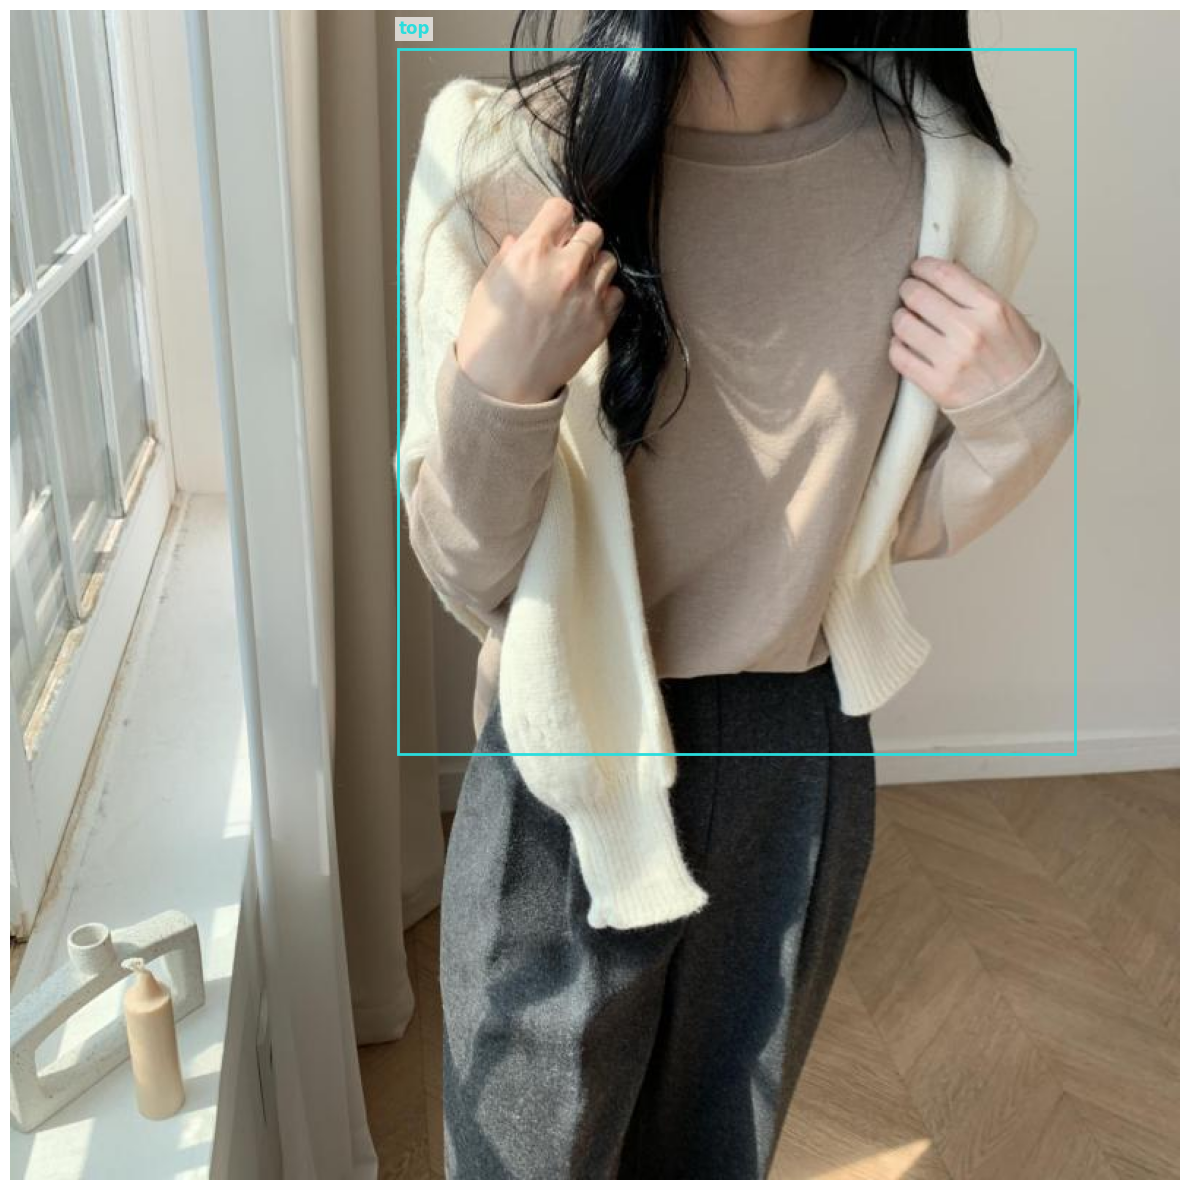

In [27]:
import os
import json
import shutil
import numpy as np
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

def create_dataset_structure():
    """데이터셋 폴더 구조 생성"""
    dirs = [
        "datasets/images/train", "datasets/labels/train",
        "datasets/masks/train", "datasets/reg_labels/train",
        "datasets/images/val", "datasets/labels/val",
        "datasets/masks/val", "datasets/reg_labels/val"
    ]
    for d in dirs:
        os.makedirs(d, exist_ok=True)

def create_reg_label(label_data):
    """회귀 라벨 생성"""
    reg_info = {
        "아우터": {
            "기장": None, "색상": None, 
            "소매기장": None, "소재": [], "프린트": [],
            "넥라인": None, "핏": None
        },
        "상의": {
            "기장": None, "색상": None,
            "소매기장": None, "소재": [], "프린트": [],
            "넥라인": None, "핏": None
        },
        "하의": {
            "기장": None, "색상": None, 
            "소재": [], "프린트": [], "핏": None
        },
        "원피스": {
            "기장": None, "색상": None, 
            "소매기장": None, "소재": [], "프린트": [],
            "넥라인": None, "핏": None
        },
        "스타일": None
    }
    
    # 스타일 정보 추출
    style_info = label_data.get("데이터셋 정보", {}).get("데이터셋 상세설명", {}).get("라벨링", {}).get("스타일", [])
    if style_info and isinstance(style_info, list) and len(style_info) > 0:
        reg_info["스타일"] = style_info[0].get("스타일", None)
    
    # 각 의류 카테고리 정보 추출
    categories = ["아우터", "상의", "하의", "원피스"]
    for category in categories:
        cat_info = label_data.get("데이터셋 정보", {}).get("데이터셋 상세설명", {}).get("라벨링", {}).get(category, [{}])[0]
        if cat_info:
            for key, value in cat_info.items():
                if key in reg_info[category]:
                    reg_info[category][key] = value
    
    return reg_info

def convert_to_yolo_format(rect_coords, img_width, img_height):
    """렉트 좌표를 YOLO 포맷으로 변환"""
    x = rect_coords["X좌표"]
    y = rect_coords["Y좌표"]
    w = rect_coords["가로"]
    h = rect_coords["세로"]
    
    x_center = (x + w/2) / img_width
    y_center = (y + h/2) / img_height
    width = w / img_width
    height = h / img_height
    
    return [x_center, y_center, width, height]

# def create_mask_from_polygon(polygon_coords, img_width, img_height):
#     """폴리곤 좌표로부터 마스크 생성"""
#     mask = Image.new('L', (img_width, img_height), 0)
#     draw = ImageDraw.Draw(mask)
    
#     points = []
#     sorted_coords = sorted([(k, v) for k, v in polygon_coords.items()], 
#                          key=lambda x: int(''.join(filter(str.isdigit, x[0]))))
    
#     for i in range(len(sorted_coords)//2):
#         x = sorted_coords[i][1]
#         y = sorted_coords[i + len(sorted_coords)//2][1]
#         points.append((x, y))
    
#     draw.polygon(points, fill=255)
#     return mask

def process_files(image_files, label_files, split='train'):
    """전체 파일 처리"""
    create_dataset_structure()
    
    # 의류 카테고리 정의
    categories = {
        "아우터": 0,
        "상의": 1,
        "하의": 2,
        "원피스": 3
    }
    
    processed_files = []
    filename_mapping = {}
    counter = 1
    
    # 모든 이미지 파일을 하나의 리스트로 통합
    all_images = []
    for img_paths in image_files.values():
        all_images.extend(img_paths)
    
    for img_path in tqdm(sorted(all_images)):
        orig_basename = Path(img_path).stem
        new_basename = f"{counter:06d}"
        filename_mapping[orig_basename] = new_basename
        counter += 1
        
        # 이미지 복사
        new_img_path = os.path.abspath(f"datasets/images/{split}/{new_basename}.jpg")
        print(f"파일: {img_path} -> {new_img_path}")
        shutil.copy2(img_path, new_img_path)
        
        # 라벨 찾기
        label_path = None
        for style_labels in label_files.values():
            label_path = next((p for p in style_labels if orig_basename in p), None)
            if label_path:
                break
        
        if label_path:
            try:
                with open(label_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
            except UnicodeDecodeError:
                with open(label_path, 'r', encoding='latin-1') as f:
                    data = json.load(f)
            
            img_info = data["이미지 정보"]
            img_width = img_info["이미지 너비"]
            img_height = img_info["이미지 높이"]
            
            labels = []
            rect_coords = data["데이터셋 정보"]["데이터셋 상세설명"]["렉트좌표"]
            
            # 의류 카테고리별 바운딩 박스 생성
            for category, category_id in categories.items():
                coords = rect_coords.get(category, [{}])[0]
                if coords:
                    yolo_coords = convert_to_yolo_format(coords, img_width, img_height)
                    labels.append([category_id] + yolo_coords)
            
            # 라벨 저장
            if labels:
                new_label_path = os.path.abspath(f"datasets/labels/{split}/{new_basename}.txt")
                with open(new_label_path, 'w') as f:
                    for label in labels:
                        f.write(' '.join(map(str, label)) + '\n')
                        
            # 회귀 라벨 생성 및 저장
            reg_label = create_reg_label(data)
            reg_label_path = os.path.abspath(f"datasets/reg_labels/{split}/{new_basename}.json")
            with open(reg_label_path, 'w', encoding='utf-8') as f:
                json.dump(reg_label, f, ensure_ascii=False, indent=2)
            
            processed_files.append((new_basename, labels))
    
    category_names = ["outer", "top", "bottom", "dress"]
    return processed_files, filename_mapping, category_names


def visualize_bbox(img_path, label_path, category_names):
    """바운딩 박스 시각화"""
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width = img.shape[:2]
    
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(category_names)))
    
    with open(label_path, 'r') as f:
        lines = f.readlines()
    
    for line in lines:
        category_id, x_center, y_center, w, h = map(float, line.strip().split())
        
        abs_x = int(x_center * width)
        abs_y = int(y_center * height)
        abs_w = int(w * width)
        abs_h = int(h * height)
        x1 = abs_x - abs_w//2
        y1 = abs_y - abs_h//2
        
        color = colors[int(category_id)]
        rect = plt.Rectangle((x1, y1), abs_w, abs_h,
                           fill=False,
                           color=color,
                           linewidth=2)
        plt.gca().add_patch(rect)
        
        label = category_names[int(category_id)]
        plt.text(x1, y1-10, label,
                color=color,
                fontsize=12,
                fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2))
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 실행
processed_files, filename_mapping, category_names = process_files(image_files, label_files, split='train')

# 결과 확인
if processed_files:
    first_file = processed_files[0]
    img_path = os.path.abspath(f"datasets/images/train/{first_file[0]}.jpg")
    label_path = os.path.abspath(f"datasets/labels/train/{first_file[0]}.txt")
    visualize_bbox(img_path, label_path, category_names)

# Validation Set

In [29]:
# 사용 예시
base_path = "E:/Workspace/K-fashion_valid/원천데이터"
target_styles = ['스트리트', '젠더리스']
max_files = {'스트리트': 1200, '젠더리스': 400}

# 이미지 파일 수집
image_files = get_category_files(base_path, target_styles, data_type='image', max_files=max_files)

# 라벨 파일 수집
label_path = "E:/Workspace/K-fashion_valid/label"
label_files = get_category_files(label_path, target_styles, data_type='label',max_files=max_files)

# 실행
processed_files, filename_mapping, category_names = process_files(image_files, label_files, split='val')

# 결과 확인
if processed_files:
    first_file = processed_files[0]
    img_path = f"datasets/images/val/{first_file[0]}.jpg"
    label_path = f"datasets/labels/val/{first_file[0]}.txt"
    visualize_bbox(img_path, label_path, category_names)


스트리트 스타일:
파일 개수: 1200개
첫 번째 이미지: 1000005.jpg

젠더리스 스타일:
파일 개수: 400개
첫 번째 이미지: 1004301.jpg
경고: 스트리트 카테고리 폴더가 존재하지 않습니다.
경고: 젠더리스 카테고리 폴더가 존재하지 않습니다.


  7%|▋         | 113/1600 [00:00<00:01, 1125.55it/s]

파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1000005.jpg -> e:\Workspace\AIService2\datasets\images\val\000001.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1000015.jpg -> e:\Workspace\AIService2\datasets\images\val\000002.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1000025.jpg -> e:\Workspace\AIService2\datasets\images\val\000003.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1000035.jpg -> e:\Workspace\AIService2\datasets\images\val\000004.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1000045.jpg -> e:\Workspace\AIService2\datasets\images\val\000005.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1000055.jpg -> e:\Workspace\AIService2\datasets\images\val\000006.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1000065.jpg -> e:\Workspace\AIService2\datasets\images\val\000007.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1000075.jpg -> e:\Workspace\AIService2\datasets\images\val\000008.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1000085.jpg -> e:\Workspace\AIService2\datas

 21%|██        | 336/1600 [00:00<00:01, 1051.53it/s]

파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1003655.jpg -> e:\Workspace\AIService2\datasets\images\val\000220.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1003665.jpg -> e:\Workspace\AIService2\datasets\images\val\000221.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1003675.jpg -> e:\Workspace\AIService2\datasets\images\val\000222.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1003685.jpg -> e:\Workspace\AIService2\datasets\images\val\000223.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1003695.jpg -> e:\Workspace\AIService2\datasets\images\val\000224.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1003705.jpg -> e:\Workspace\AIService2\datasets\images\val\000225.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\100377.jpg -> e:\Workspace\AIService2\datasets\images\val\000226.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1003911.jpg -> e:\Workspace\AIService2\datasets\images\val\000227.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1004081.jpg -> e:\Workspace\AIService2\datase

 34%|███▍      | 552/1600 [00:00<00:01, 1023.61it/s]

파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1007344.jpg -> e:\Workspace\AIService2\datasets\images\val\000443.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1007354.jpg -> e:\Workspace\AIService2\datasets\images\val\000444.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1007364.jpg -> e:\Workspace\AIService2\datasets\images\val\000445.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1007374.jpg -> e:\Workspace\AIService2\datasets\images\val\000446.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1007384.jpg -> e:\Workspace\AIService2\datasets\images\val\000447.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1007394.jpg -> e:\Workspace\AIService2\datasets\images\val\000448.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1007404.jpg -> e:\Workspace\AIService2\datasets\images\val\000449.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1007414.jpg -> e:\Workspace\AIService2\datasets\images\val\000450.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1007424.jpg -> e:\Workspace\AIService2\datas

 48%|████▊     | 773/1600 [00:00<00:00, 1030.12it/s]

파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1011228.jpg -> e:\Workspace\AIService2\datasets\images\val\000642.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1011238.jpg -> e:\Workspace\AIService2\datasets\images\val\000643.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1011278.jpg -> e:\Workspace\AIService2\datasets\images\val\000644.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1011288.jpg -> e:\Workspace\AIService2\datasets\images\val\000645.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1011298.jpg -> e:\Workspace\AIService2\datasets\images\val\000646.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1011308.jpg -> e:\Workspace\AIService2\datasets\images\val\000647.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1011318.jpg -> e:\Workspace\AIService2\datasets\images\val\000648.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1011328.jpg -> e:\Workspace\AIService2\datasets\images\val\000649.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1011338.jpg -> e:\Workspace\AIService2\datas

 62%|██████▏   | 996/1600 [00:00<00:00, 1075.56it/s]

파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1017449.jpg -> e:\Workspace\AIService2\datasets\images\val\000865.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1017459.jpg -> e:\Workspace\AIService2\datasets\images\val\000866.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1017469.jpg -> e:\Workspace\AIService2\datasets\images\val\000867.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1017479.jpg -> e:\Workspace\AIService2\datasets\images\val\000868.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1017489.jpg -> e:\Workspace\AIService2\datasets\images\val\000869.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1017519.jpg -> e:\Workspace\AIService2\datasets\images\val\000870.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1017619.jpg -> e:\Workspace\AIService2\datasets\images\val\000871.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1017629.jpg -> e:\Workspace\AIService2\datasets\images\val\000872.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\101766.jpg -> e:\Workspace\AIService2\datase

 76%|███████▌  | 1208/1600 [00:01<00:00, 1023.19it/s]

파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1021509.jpg -> e:\Workspace\AIService2\datasets\images\val\001091.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1021519.jpg -> e:\Workspace\AIService2\datasets\images\val\001092.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1021529.jpg -> e:\Workspace\AIService2\datasets\images\val\001093.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1021539.jpg -> e:\Workspace\AIService2\datasets\images\val\001094.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1021549.jpg -> e:\Workspace\AIService2\datasets\images\val\001095.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1021559.jpg -> e:\Workspace\AIService2\datasets\images\val\001096.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1021579.jpg -> e:\Workspace\AIService2\datasets\images\val\001097.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1021589.jpg -> e:\Workspace\AIService2\datasets\images\val\001098.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\스트리트\1021599.jpg -> e:\Workspace\AIService2\datas

 89%|████████▉ | 1423/1600 [00:01<00:00, 1031.78it/s]

파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\1044427.jpg -> e:\Workspace\AIService2\datasets\images\val\001310.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\1055255.jpg -> e:\Workspace\AIService2\datasets\images\val\001311.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\105644.jpg -> e:\Workspace\AIService2\datasets\images\val\001312.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\105686.jpg -> e:\Workspace\AIService2\datasets\images\val\001313.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\105697.jpg -> e:\Workspace\AIService2\datasets\images\val\001314.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\105883.jpg -> e:\Workspace\AIService2\datasets\images\val\001315.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\106098.jpg -> e:\Workspace\AIService2\datasets\images\val\001316.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\1061517.jpg -> e:\Workspace\AIService2\datasets\images\val\001317.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\1061527.jpg -> e:\Workspace\AIService2\datasets\i

100%|██████████| 1600/1600 [00:01<00:00, 1036.12it/s]

파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\1271524.jpg -> e:\Workspace\AIService2\datasets\images\val\001539.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\1271554.jpg -> e:\Workspace\AIService2\datasets\images\val\001540.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\1271624.jpg -> e:\Workspace\AIService2\datasets\images\val\001541.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\1271704.jpg -> e:\Workspace\AIService2\datasets\images\val\001542.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\1271714.jpg -> e:\Workspace\AIService2\datasets\images\val\001543.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\1271834.jpg -> e:\Workspace\AIService2\datasets\images\val\001544.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\1271844.jpg -> e:\Workspace\AIService2\datasets\images\val\001545.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\1272094.jpg -> e:\Workspace\AIService2\datasets\images\val\001546.jpg
파일: E:/Workspace/K-fashion_valid/원천데이터\젠더리스\1272104.jpg -> e:\Workspace\AIService2\datas

In [ ]:
# 결과 확인

first_file = processed_files[1]
img_path = f"datasets/images/train/{first_file[0]}.jpg"
label_path = f"datasets/labels/train/{first_file[0]}.txt"
visualize_bbox(img_path, label_path, category_names)

IndexError: list index out of range

ㄴ